# This is a work-in-progress notebook

We wish to know this:

1. How well does the model identify the correct number of senses for the target word?
2. **How well does the model identify the correct senses for the target word?**
3. **How well does the model assign the right words to a given sense of the target word?**
4. How well does the model assign the senses to the time intervals for the target word?

The script will evaluate **Q2** and **Q3**. Q4 will follow.

### Filenames of different model outputs must be different

In [1261]:
# Basic variables and imports:

import codecs, csv, os, time, re, io
from os import listdir
from os.path import isfile, join
from  more_itertools import unique_everseen

# directories

dir_in = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "src", "dynamic-senses","greek_input","all_results"))
dir_out = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "evaluation", "evaluation_output"))
#dir_expert = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "evaluation", "evaluation_input"))
dir_expert = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "evaluation", "evaluation_input","new_texts"))

dir_parameter = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "src", "dynamic-senses","greek_input","all_parameters"))

# change parameter file and senses etc here

genre = "all"  # "all" by default. To focus on a specific genre change the value, cfr "s_senses" file

s_senses = io.open(dir_expert+"/senses_69419.txt","r")  # expert senses annotation
k_senses = io.open(dir_in+"/3_output_K15/69419/output.dat","r") # model output
parameter_file = io.open(dir_parameter+"/params_v8.txt","r")

bugfix = 0

target_id = os.path.basename(s_senses.name)
target_id = target_id.replace("senses_","")
target_id = target_id.replace(".txt","")
print("Target ID:",target_id)

param_name = os.path.basename(parameter_file.name)
param_name = param_name.replace("params","")

print(s_senses)
print(k_senses)
print(param_name)
print(dir_out+"/"+target_id+param_name)


results_file = io.open(dir_out+"/"+target_id+param_name,"w")

# DEBUG:
#s_senses = io.open(dir_in+"/senses_69419_debug.txt","r")
#k_senses = io.open(dir_in+"/mus_debug.dat","r")
# k0 = mus4
# k1 = mus3
# k2 = mus2
# k3 = mus1
# k4 = nothing



file_senses = s_senses.readlines()[1:]
output_senses = k_senses.read()

i = 0
for line in parameter_file.readlines():
    i+=1
    if i == 4:
        line = line.split("\t")
        window_size = int(line[1])
        print("Window size:",window_size,type(window_size))
        
    if i == 13:
        line = line.split("\t")
        iterations = int(line[1])
        print("Iterations:",iterations,type(iterations))
        
#    if i == 14:
#        line = line.split("\t")
#        start_time = int(line[1])
#        print("Start time:",start_time,type(start_time))
        
#    if i == 15:
#        line = line.split("\t")
#        end_time = int(line[1])
#        print("End time:",end_time,type(end_time))
    
    if i == 16:
        line = line.split("\t")
        time_interval = int(line[1])
        print("Time interval:",time_interval,type(time_interval))
        
#### START TIME AND END TIME ARE NOW DEFINED BY READING THE ANNOTATION
## (because we have the same parameter file for all things)

annotation_dates = list()
for line in file_senses:
    cells = line.split("\t")
    
    if genre == "all":  # if we take everything
        annotation_dates.append(int(cells[0]))
    
    else:
        if cells[1] == genre:
            annotation_dates.append(int(cells[0]))
            
start_time = min(annotation_dates)
end_time = max(annotation_dates)

print("start_time",start_time)
print("end_time",end_time)
        

results_file.write("Target ID %s Window size %s Start time %s End time %s Time Interval %s Iterations %s\n" % (target_id,window_size,start_time,end_time,time_interval,iterations))

Target ID: 69419
<_io.TextIOWrapper name='/Users/hengchen/git/seed-semantic-change/evaluation/evaluation_input/new_texts/senses_69419.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/Users/hengchen/git/seed-semantic-change/src/dynamic-senses/greek_input/all_results/3_output_K15/69419/output.dat' mode='r' encoding='UTF-8'>
_v8.txt
/Users/hengchen/git/seed-semantic-change/evaluation/evaluation_output/69419_v8.txt
Window size: 5 <class 'int'>
Iterations: 1000 <class 'int'>
Time interval: 100 <class 'int'>
start_time -430
end_time 365


93

In [1262]:
# Defining time periods from the output file

total_years = end_time-start_time
perioddd = 0
temp_start_time = start_time

for year in range(temp_start_time,end_time+1):
    if temp_start_time + time_interval < end_time+1:
        perioddd +=1
        print(perioddd)
        temp_start_time += time_interval

number_of_slices = perioddd + 1

slice_duration = time_interval # read from the parameter file
print(slice_duration)

print(start_time,end_time)

slice_years = dict()

for period in range(0,number_of_slices):
    slice_years[period] = list()
    
   # if period == number_of_slices-1:
   #     for i in range(latest_i,end_time):
   #         slice_years[period].append(i)  
    
    #if period != number_of_slices-1:
    for i in range(start_time,end_time+1):
        
        if i >= int(period*slice_duration) + start_time:
            if i < int((period+1)*slice_duration) + start_time:
                slice_years[period].append(i)
                latest_i = i
                
#slice_years[period].append(latest_i+1)  #  in case we have a slice that ends on a century
                    
        
        
    

print(slice_years)

1
2
3
4
5
6
7
100
-430 365
{0: [-430, -429, -428, -427, -426, -425, -424, -423, -422, -421, -420, -419, -418, -417, -416, -415, -414, -413, -412, -411, -410, -409, -408, -407, -406, -405, -404, -403, -402, -401, -400, -399, -398, -397, -396, -395, -394, -393, -392, -391, -390, -389, -388, -387, -386, -385, -384, -383, -382, -381, -380, -379, -378, -377, -376, -375, -374, -373, -372, -371, -370, -369, -368, -367, -366, -365, -364, -363, -362, -361, -360, -359, -358, -357, -356, -355, -354, -353, -352, -351, -350, -349, -348, -347, -346, -345, -344, -343, -342, -341, -340, -339, -338, -337, -336, -335, -334, -333, -332, -331], 1: [-330, -329, -328, -327, -326, -325, -324, -323, -322, -321, -320, -319, -318, -317, -316, -315, -314, -313, -312, -311, -310, -309, -308, -307, -306, -305, -304, -303, -302, -301, -300, -299, -298, -297, -296, -295, -294, -293, -292, -291, -290, -289, -288, -287, -286, -285, -284, -283, -282, -281, -280, -279, -278, -277, -276, -275, -274, -273, -272, -271, -27

## TODO

- ~~create the notebook~~
- ~~organise the notebook~~
- ~~write "general idea" pseudocode for the evaluation~~
- ~~get input files~~
- ~~figure out data structures to store the variables~~
- ~~write actual code~~

## Q2: How well does the model identify the correct senses for the target word?

### Pseudocode 

In [1263]:
# For each target word, we have a list of senses  s (given by the expert)
# For each target word, we have a list of senses k (given by the model)
# This Q consists in matching s and k, and doing so in a confident way --> confidence score

for each k:
    for each s:
        create conf(k,s)

# What is conf(k,s)?
        conf(k,s) = (p1*match(w1,s)+p2*match(w1,s)+px(wx,s))/10 WHERE
    
            px = probability of word wx 
                
                and
            
            match(wx,s) =   1/number_of_senses_assigned_to_wx if s_is_one_of_them 
            
                    or 
                            0 if w_is_not_associated_to_s
                
# Once we have gone through all s for one k, we have to choose the best k for s. How? (TBD, cfr Valerio and Barbara)

# Once all ks have been assigned to all ss (or NA), we can calculate a general confidence score for the model.
# One easy way to do that: 

conf_score_model = number_of_non_NA/k

SyntaxError: invalid syntax (<ipython-input-1263-82fa54601c9a>, line 5)

### Real code

Steps:

- extract all senses from the file
- use those senses as keys for a dictionary, `dict_of_words`
- fill the dictionary: for each key, we store a list of words pertaining to that sense
- transform the lists as sets so as to remove duplicates within the same sense
- create a dictionary with a word as a key and its weight as a value, depending on how many senses it appears
- parse the model output and get the probability weights for each word
- do not take into account the first line
- take care of empty lines

Todo:




In [1264]:
expert_senses = list() # list where we store all sense ids provided by expert
#sense_for_period_counter = 0


for line in file_senses:
    cells = line.split("\t")
    
    if genre == "all":  # if we take everything    
        sense = cells[11] # The sense ID is after the 10th tab
        if sense != 'w':
            if int(cells[12]) == 1:   ## we only take the senses annotated because of collocates and nothing else
                #print(int(s[12]))
                expert_senses.append(sense)    
            else:
                expert_senses.append("NA") # if the reason for finding the sense is not "collocates" (1), the sense NA is created
        else:
             expert_senses.append("NA")
                
    else: # specific genre only
        
        if cells[1] == genre:

            sense = cells[11] # The sense ID is after the 10th tab
            if sense != 'w':
                if int(cells[12]) == 1:   ## we only take the senses annotated because of collocates and nothing else
                    #print(int(s[12]))
                    expert_senses.append(sense)    
                else:
                    expert_senses.append("NA") # if the reason for finding the sense is not "collocates" (1), the sense NA is created
            else:
                 expert_senses.append("NA")


#print(len(expert_senses),expert_senses,len(set(expert_senses)))


expert_senses_set = list(set(expert_senses)) # we only keep the unique senses
expert_senses = list(unique_everseen(expert_senses))
print("SET",expert_senses_set)
print("ITERTOOLS",expert_senses)

number_of_s = len(expert_senses)  # we create a variable that stores the number of unique senses
print("Number of senses:",number_of_s,expert_senses)

# This dictionary has a sense as a key, and a list of words as a value. 
dict_of_words = dict()
# This list stores all words
list_of_all_words = list()
# This dictionary stores all words as keys and their weight as value
word_weight = dict()
# This dictionary stores the number of times a sense appears in a slice
sense_date_amount = dict()

# This list stores words in w and not collocates senses
list_of_NA_words = list()

dummy_counter = 0


sentences_smaller_than_window_size = 0

for i in range(0,number_of_s): # for each sense, we create a dictionary entry which has a list as value
    dict_of_words[expert_senses[i]] = list()
    print(expert_senses[i])

    for line in file_senses: # we go back in the file
        
        
        
        cells = line.split("\t") # splitting on tabs
        
        if genre == "all":   # all genres
            
            if int(cells[12]) == 1:  # senses inferred from collocates
                if cells[11] == expert_senses[i]:      # we store all words for one sense 


                    sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                    list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces


                    index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                    list_of_ids_window = list()
                    for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                        try:   # if there's a word it's taken into account

                            list_of_ids_window.append(list_of_ids[n])

                        except IndexError: # if there isn't, too bad
                            sentences_smaller_than_window_size += 1

                    for word_id in list_of_ids_window:
                        if int(cells[12]) == 1:


                            if cells[11] == expert_senses[i]:  

                                dict_of_words[expert_senses[i]].append(word_id)                    

                        list_of_all_words.append(word_id) # we store all words, we'll iterate over that for scores


                # if the sense is "w", the collocates are put in the "NA words"

                if cells[11] == "w":
                    #print("W")
                    sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                    list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces
                    index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                    list_of_ids_window = list()
                    for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                        try:   # if there's a word it's taken into account

                            list_of_NA_words.append(list_of_ids[n])
                            list_of_all_words.append(list_of_ids[n])
                        except IndexError:
                            dummy_counter +=1

            else:  # words that are in "non collocates senses"
                #print("NON COLOC")
                sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                #print(sentence_of_ids)
                list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces
                index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                #print(index_of_target)
                list_of_ids_window = list()
                #print(index_of_target-window_size,index_of_target+window_size+1)
                for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                    try:   # if there's a word it's taken into account
                        #print(list_of_ids_window)
                        #print(list_of_ids[n])
                        list_of_NA_words.append(list_of_ids[n])
                        list_of_all_words.append(list_of_ids[n])
                    except IndexError:
                            dummy_counter +=1
                #print(list_of_NA_words)
                
        else:
            
            if cells[1] == genre:
                if int(cells[12]) == 1:  # senses inferred from collocates
                    if cells[11] == expert_senses[i]:      # we store all words for one sense 


                        sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                        list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces


                        index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                        list_of_ids_window = list()
                        for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                            try:   # if there's a word it's taken into account

                                list_of_ids_window.append(list_of_ids[n])

                            except IndexError: # if there isn't, too bad
                                sentences_smaller_than_window_size += 1

                        for word_id in list_of_ids_window:
                            if int(cells[12]) == 1:


                                if cells[11] == expert_senses[i]:  

                                    dict_of_words[expert_senses[i]].append(word_id)                    

                            list_of_all_words.append(word_id) # we store all words, we'll iterate over that for scores


                    # if the sense is "w", the collocates are put in the "NA words"

                    if cells[11] == "w":
                        #print("W")
                        sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                        list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces
                        index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                        list_of_ids_window = list()
                        for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                            try:   # if there's a word it's taken into account

                                list_of_NA_words.append(list_of_ids[n])
                                list_of_all_words.append(list_of_ids[n])
                            except IndexError:
                                dummy_counter +=1

                else:  # words that are in "non collocates senses"
                    #print("NON COLOC")
                    sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                    #print(sentence_of_ids)
                    list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces
                    index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                    #print(index_of_target)
                    list_of_ids_window = list()
                    #print(index_of_target-window_size,index_of_target+window_size+1)
                    for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                        try:   # if there's a word it's taken into account
                            #print(list_of_ids_window)
                            #print(list_of_ids[n])
                            list_of_NA_words.append(list_of_ids[n])
                            list_of_all_words.append(list_of_ids[n])
                        except IndexError:
                                dummy_counter +=1
                    #print(list_of_NA_words)





            
            
            
            
            
            
            
            
            
    # Here, we remove duplicates
    #dict_of_words[expert_senses[i]].append("79223") #testing
    
    dict_of_words[expert_senses[i]] = list(set(dict_of_words[expert_senses[i]]))
    
    
      
    print("i",i,"sense",expert_senses[i],"number of words",len(dict_of_words[expert_senses[i]]))
    print("words",set(dict_of_words[expert_senses[i]]))
    print("\n\n")

# NOW THAT WE HAVE A LIST OF NA WORDS 
# We can put that in the dict_of_words[expert_sense] dictionary
#print("NA words",list_of_NA_words)
list_of_NA_words = list(set(list_of_NA_words))
dict_of_words["NA"] = list_of_NA_words

print("sentences smaller than window size",window_size,":",sentences_smaller_than_window_size)
#print("dummy",dummy_counter)
print("number of NA words:",len(list_of_NA_words))
print("same?",len(dict_of_words["NA"]))

results_file.write("Expert senses %s Total %s \n" %(expert_senses,len(expert_senses)))

SET ['NA', 'mus-2', 'mus-1', 'mus-4']
ITERTOOLS ['mus-1', 'NA', 'mus-4', 'mus-2']
Number of senses: 4 ['mus-1', 'NA', 'mus-4', 'mus-2']
mus-1
i 0 sense mus-1 number of words 263
words {'nlsj32167', '33770', '51815', '26207', '75552', '70477', '23690', '18937', '27415', '29624', '31161', '1564', '31709', '7529', '115193', '73435', '103942', '114816', '36165', '43206', '17962', '64586', 'nlsj8970', '70105', '76335', '96768', 'nlsj5904', '18271', '19641', 'nlsj69856', '114706', '59124', '110456', '83774', '51849', '107959', '56406', '40156', '105816', '67974', '104538', '2834', '95221', '108780', '42659', '49506', '8909', '37776', '114587', '110484', '100965', '21431', '75477', '52571', '16400', '38547', '84422', '98173', '98234', 'nlsj114757', '47447', '51256', '41538', 'nlsj4012', '29962', '4845', 'nlsj4784', '51376', '41633', '71308', '104421', '80555', '41536', '7561', '63713', '114688', '23678', '41705', '34372', '93786', '63845', '58478', '12641', '2583', '29883', '48291', '79947', 

57

In [1265]:
sense_date_amount = dict() # dict where we have the number of senses for [sense,period]

# this dictionary is now initialised with 0 for each CORRECT sense,period pair we have
for sense in expert_senses:
    for period in slice_years.keys():
        sense_date_amount[sense,period] = 0
        
print(sense_date_amount,"\n")        

counter = 0

for line in file_senses: 
    #print(len(file_senses))
    cells = line.split("\t")
    
    if genre == "all":
    
        sense = cells[11] # The sense ID is after the 10th tab
        if sense != 'w':
            #print(sense)


            if int(cells[12]) == 1:   ## we only take the senses annotated because of collocates and nothing else
                #print(int(s[12]))
                #expert_senses.append(sense)

                for period in slice_years.keys():
                    if int(cells[0]) in slice_years[period]:
                        #sense_for_period_counter += 1
                        sense_date_amount[sense,period] += 1
                        counter += 1

            else:
                for period in slice_years.keys():
                    if int(cells[0]) in slice_years[period]:
                        #sense_for_period_counter += 1
                        sense_date_amount["NA",period] += 1
                        counter += 1



        if sense == "w":  # counting the NAs
                for period in slice_years.keys():
                    if int(cells[0]) in slice_years[period]:
                        #sense_for_period_counter += 1
                        sense_date_amount["NA",period] += 1
                        counter += 1
                    

    else:
        if genre == cells[1]:
            sense = cells[11] # The sense ID is after the 10th tab
            if sense != 'w':
                #print(sense)


                if int(cells[12]) == 1:   ## we only take the senses annotated because of collocates and nothing else
                    #print(int(s[12]))
                    #expert_senses.append(sense)

                    for period in slice_years.keys():
                        if int(cells[0]) in slice_years[period]:
                            #sense_for_period_counter += 1
                            sense_date_amount[sense,period] += 1
                            counter += 1

                else:
                    for period in slice_years.keys():
                        if int(cells[0]) in slice_years[period]:
                            #sense_for_period_counter += 1
                            sense_date_amount["NA",period] += 1
                            counter += 1



            if sense == "w":  # counting the NAs
                    for period in slice_years.keys():
                        if int(cells[0]) in slice_years[period]:
                            #sense_for_period_counter += 1
                            sense_date_amount["NA",period] += 1
                            counter += 1
                    
print(sense_date_amount)
print(counter)

{('mus-1', 0): 0, ('mus-1', 1): 0, ('mus-1', 2): 0, ('mus-1', 3): 0, ('mus-1', 4): 0, ('mus-1', 5): 0, ('mus-1', 6): 0, ('mus-1', 7): 0, ('NA', 0): 0, ('NA', 1): 0, ('NA', 2): 0, ('NA', 3): 0, ('NA', 4): 0, ('NA', 5): 0, ('NA', 6): 0, ('NA', 7): 0, ('mus-4', 0): 0, ('mus-4', 1): 0, ('mus-4', 2): 0, ('mus-4', 3): 0, ('mus-4', 4): 0, ('mus-4', 5): 0, ('mus-4', 6): 0, ('mus-4', 7): 0, ('mus-2', 0): 0, ('mus-2', 1): 0, ('mus-2', 2): 0, ('mus-2', 3): 0, ('mus-2', 4): 0, ('mus-2', 5): 0, ('mus-2', 6): 0, ('mus-2', 7): 0} 

{('mus-1', 0): 3, ('mus-1', 1): 4, ('mus-1', 2): 1, ('mus-1', 3): 2, ('mus-1', 4): 2, ('mus-1', 5): 14, ('mus-1', 6): 14, ('mus-1', 7): 0, ('NA', 0): 16, ('NA', 1): 3, ('NA', 2): 3, ('NA', 3): 2, ('NA', 4): 6, ('NA', 5): 15, ('NA', 6): 45, ('NA', 7): 1, ('mus-4', 0): 21, ('mus-4', 1): 0, ('mus-4', 2): 0, ('mus-4', 3): 1, ('mus-4', 4): 0, ('mus-4', 5): 21, ('mus-4', 6): 8, ('mus-4', 7): 1, ('mus-2', 0): 0, ('mus-2', 1): 0, ('mus-2', 2): 0, ('mus-2', 3): 0, ('mus-2', 4): 0, 

In [1266]:
# For every word in the list of words that we have
# we count the number of senses it appears in
# we use that number to divide its importance: 1 sense = 1 importance; 2 senses = 0.5 importance
# this can be finetuned

print(expert_senses)
#print("list_of_NA_words",list_of_NA_words,"\n\n")
#print("list of mus 1 words",dict_of_words['mus-1'])

# This dictionary stores words in w and not collocates senses
word_weight_NA = dict()

for word in list_of_all_words:
#word = "113560"
    x = 0  # number of times word appears in different senses excluding NAs
    z = 0 # number of times word appears in different senses including NAs
#print(word)
    for i in range(0,number_of_s):
        if word in dict_of_words[expert_senses[i]]:
            #if word == "105344":
            #    print("YO")
                
            if expert_senses[i] != "NA":
                x += 1 
                #print("froot the loop")
                

    if x != 0:
        word_weight[word] = float(1/x)
        #print(word,"this is a x!=0",x,"this is its weight",float(1/x))
        
        if word in list_of_NA_words:
            z = x + 1
            #print(z)
            #print(word,"this is a z",z,"this is its weight",float(1/z))
            
            word_weight_NA[word] = float(1/z)
            
    else:  # if word doesn't exist in non-NA senses
        word_weight_NA[word] = 1/1
        word_weight[word] = 0  # with this we prevent the case that a word that is ONLY in NA has no weight 
  
        
    #else: 
    #    word_weight_NA[word] = word_weight[word]
        
#print(word_weight_NA)    
#print(word,word_weight[word])

#print(word_weight_NA["53826"])

#for key in word_weight_NA.keys():
#    print(key,word_weight_NA[key])
for word in list_of_all_words:
    try: 
        print(word,word_weight[word])
    except KeyError:
        print(word,"isnt in non-NA senses")
    try:
        print(word,word_weight_NA[word])
    except KeyError:
        print(word,"isnt in NA sense")

['mus-1', 'NA', 'mus-4', 'mus-2']
36165 1.0
36165 0.5
18334 1.0
18334 0.5
34855 1.0
34855 isnt in NA sense
41633 1.0
41633 isnt in NA sense
71314 1.0
71314 0.5
69419 0.3333333333333333
69419 0.25
15380 1.0
15380 isnt in NA sense
42890 1.0
42890 0.5
110302 1.0
110302 isnt in NA sense
104311 1.0
104311 0.5
16400 1.0
16400 0.5
50093 0
50093 1.0
47665 0
47665 1.0
63143 0
63143 1.0
45996 0.5
45996 0.3333333333333333
113560 1.0
113560 0.5
69419 0.3333333333333333
69419 0.25
62204 1.0
62204 0.5
22739 0
22739 1.0
57262 1.0
57262 0.5
29828 0
29828 1.0
23468 0
23468 1.0
110598 0
110598 1.0
75263 0
75263 1.0
69419 0.3333333333333333
69419 0.25
19641 1.0
19641 0.5
nlsj78558 0
nlsj78558 1.0
80761 1.0
80761 0.5
95258 0
95258 1.0
26447 0
26447 1.0
22100 1.0
22100 0.5
106502 0
106502 1.0
30911 0
30911 1.0
69419 0.3333333333333333
69419 0.25
22100 1.0
22100 0.5
22209 0.5
22209 0.3333333333333333
53442 1.0
53442 0.5
8909 1.0
8909 0.5
nlsj52509 0
nlsj52509 1.0
75263 0
75263 1.0
22209 0.5
22209 0.33333333

32657 0
32657 1.0
nlsj11198 1.0
nlsj11198 0.5
7182 0
7182 1.0
6174 1.0
6174 0.5
71976 0
71976 1.0
28569 0
28569 1.0
73064 0
73064 1.0
26447 0
26447 1.0
23799 0
23799 1.0
69419 0.3333333333333333
69419 0.25
5390 0
5390 1.0
12625 0
12625 1.0
65552 0.5
65552 0.3333333333333333
72287 1.0
72287 0.5
nlsj32160 0
nlsj32160 1.0
50679 1.0
50679 isnt in NA sense
12409 1.0
12409 isnt in NA sense
nlsj5627 1.0
nlsj5627 isnt in NA sense
104872 1.0
104872 isnt in NA sense
3398 1.0
3398 0.5
69419 0.3333333333333333
69419 0.25
52571 0.3333333333333333
52571 0.25
14362 1.0
14362 isnt in NA sense
17381 1.0
17381 isnt in NA sense
43206 0.5
43206 isnt in NA sense
51849 1.0
51849 isnt in NA sense
85306 0.5
85306 0.3333333333333333
93812 0.5
93812 0.3333333333333333
26032 0
26032 1.0
49955 0
49955 1.0
56810 0
56810 1.0
69419 0.3333333333333333
69419 0.25
46195 0
46195 1.0
114972 0
114972 1.0
26684 1.0
26684 0.5
62205 0
62205 1.0
20674 0
20674 1.0
17962 1.0
17962 isnt in NA sense
73221 1.0
73221 isnt in NA sen

62204 1.0
62204 0.5
83718 1.0
83718 isnt in NA sense
21431 1.0
21431 isnt in NA sense
69419 0.3333333333333333
69419 0.25
98712 0
98712 1.0
48549 0
48549 1.0
35581 0
35581 1.0
46195 0
46195 1.0
35642 0
35642 1.0
69419 0.3333333333333333
69419 0.25
98712 0
98712 1.0
48549 0
48549 1.0
35581 0
35581 1.0
116058 0
116058 1.0
75306 0
75306 1.0
46195 0
46195 1.0
111895 1.0
111895 0.5
103942 1.0
103942 0.5
69419 0.3333333333333333
69419 0.25
nlsj9583 0
nlsj9583 1.0
112943 0
112943 1.0
83253 0
83253 1.0
22100 1.0
22100 0.5
74735 1.0
74735 0.5
69419 0.3333333333333333
69419 0.25
82954 0
82954 1.0
93388 0.5
93388 0.3333333333333333
46646 0
46646 1.0
nlsj52509 0
nlsj52509 1.0
nlsj98815 0
nlsj98815 1.0
70768 1.0
70768 0.5
nlsj2729 0
nlsj2729 1.0
62204 1.0
62204 0.5
69419 0.3333333333333333
69419 0.25
22100 1.0
22100 0.5
nlsj52509 0
nlsj52509 1.0
nlsj98815 0
nlsj98815 1.0
24261 0
24261 1.0
90504 1.0
90504 0.5
24261 0
24261 1.0
105344 0
105344 1.0
115845 0
115845 1.0
69419 0.3333333333333333
69419 0.

84534 1.0
84534 0.5
9757 0
9757 1.0
63352 1.0
63352 0.5
25018 0
25018 1.0
28355 0
28355 1.0
83251 0
83251 1.0
69419 0.3333333333333333
69419 0.25
91944 0
91944 1.0
12641 1.0
12641 0.5
31556 0
31556 1.0
86352 0
86352 1.0
50073 0
50073 1.0
98312 0
98312 1.0
43305 0
43305 1.0
74126 1.0
74126 0.5
nlsj40132 0
nlsj40132 1.0
69419 0.3333333333333333
69419 0.25
108536 0
108536 1.0
84150 0
84150 1.0
71673 0
71673 1.0
100774 0
100774 1.0
51259 0
51259 1.0
31565 0
31565 1.0
69052 0
69052 1.0
104355 0.5
104355 0.3333333333333333
69419 0.3333333333333333
69419 0.25
69419 0.3333333333333333
69419 0.25
47513 0
47513 1.0
85672 1.0
85672 0.5
83783 0
83783 1.0
110639 0.5
110639 0.3333333333333333
69419 0.3333333333333333
69419 0.25
50073 0
50073 1.0
70958 1.0
70958 0.5
50093 0
50093 1.0
71673 0
71673 1.0
55139 0
55139 1.0
95523 1.0
95523 0.5
69419 0.3333333333333333
69419 0.25
24226 0
24226 1.0
67104 0
67104 1.0
nlsj10580 0
nlsj10580 1.0
69419 0.3333333333333333
69419 0.25
95522 0
95522 1.0
95523 1.0
95

42827 0
42827 1.0
13039 1.0
13039 0.5
70768 1.0
70768 0.5
69419 0.3333333333333333
69419 0.25
66294 0
66294 1.0
3800 0
3800 1.0
88716 0
88716 1.0
48867 0
48867 1.0
5112 0
5112 1.0
69419 0.3333333333333333
69419 0.25
85672 1.0
85672 0.5
260 1.0
260 0.5
69419 0.3333333333333333
69419 0.25
85672 1.0
85672 0.5
260 1.0
260 0.5
2224 1.0
2224 0.5
110027 0
110027 1.0
92162 0
92162 1.0
110027 0
110027 1.0
62528 0
62528 1.0
69419 0.3333333333333333
69419 0.25
79103 0
79103 1.0
103942 1.0
103942 0.5
76431 0
76431 1.0
90329 0
90329 1.0
29883 0.5
29883 0.3333333333333333
51241 0
51241 1.0
4548 0
4548 1.0
69419 0.3333333333333333
69419 0.25
15893 1.0
15893 0.5
76431 0
76431 1.0
90329 0
90329 1.0
29883 0.5
29883 0.3333333333333333
51241 0
51241 1.0
48291 1.0
48291 0.5
36165 1.0
36165 0.5
nlsj96033 0
nlsj96033 1.0
67485 0
67485 1.0
75352 0
75352 1.0
69419 0.3333333333333333
69419 0.25
75306 0
75306 1.0
7832 0
7832 1.0
102381 0
102381 1.0
83434 0
83434 1.0
112559 0
112559 1.0
28360 0
28360 1.0
62204 1.

116416 0.3333333333333333
69419 0.3333333333333333
69419 0.25
nlsj82141 1.0
nlsj82141 isnt in NA sense
18062 1.0
18062 isnt in NA sense
nlsj79694 1.0
nlsj79694 isnt in NA sense
83834 1.0
83834 isnt in NA sense
83732 1.0
83732 isnt in NA sense
69419 0.3333333333333333
69419 0.25
69419 0.3333333333333333
69419 0.25
36216 1.0
36216 isnt in NA sense
109729 1.0
109729 isnt in NA sense
58429 0.5
58429 isnt in NA sense
15011 1.0
15011 isnt in NA sense
70495 1.0
70495 0.5
69419 0.3333333333333333
69419 0.25
36216 1.0
36216 isnt in NA sense
109729 1.0
109729 isnt in NA sense
51785 1.0
51785 isnt in NA sense
13985 1.0
13985 isnt in NA sense
113560 1.0
113560 0.5
101851 1.0
101851 isnt in NA sense
26039 1.0
26039 isnt in NA sense
69419 0.3333333333333333
69419 0.25
20836 1.0
20836 0.5
55391 1.0
55391 isnt in NA sense
39180 1.0
39180 isnt in NA sense
101851 1.0
101851 isnt in NA sense
45996 0.5
45996 0.3333333333333333
39180 1.0
39180 isnt in NA sense
97605 1.0
97605 isnt in NA sense
621 1.0
621 i

7944 1.0
45996 0.5
45996 0.3333333333333333
69419 0.3333333333333333
69419 0.25
103922 1.0
103922 0.5
82758 1.0
82758 0.5
80239 1.0
80239 0.5
49589 0
49589 1.0
61855 0
61855 1.0
104311 1.0
104311 0.5
19546 0
19546 1.0
nlsj100912 0
nlsj100912 1.0
11206 0
11206 1.0
82959 0
82959 1.0
69419 0.3333333333333333
69419 0.25
83774 1.0
83774 0.5
110639 0.5
110639 0.3333333333333333
31236 1.0
31236 0.5
71314 1.0
71314 0.5
104311 1.0
104311 0.5
62204 1.0
62204 0.5
69036 0
69036 1.0
116058 0
116058 1.0
75306 0
75306 1.0
31562 1.0
31562 0.5
69419 0.3333333333333333
69419 0.25
14050 0
14050 1.0
22209 0.5
22209 0.3333333333333333
7612 0
7612 1.0
46123 0
46123 1.0
66639 0
66639 1.0
116416 0.5
116416 0.3333333333333333
69419 0.3333333333333333
69419 0.25
66777 0
66777 1.0
114847 0
114847 1.0
42890 1.0
42890 0.5
114842 0
114842 1.0
66746 0
66746 1.0
106566 0
106566 1.0
72275 0
72275 1.0
51727 0
51727 1.0
12349 0
12349 1.0
75316 0
75316 1.0
69419 0.3333333333333333
69419 0.25
70105 1.0
70105 0.5
32657 0
3

72273 1.0
31948 0
31948 1.0
69419 0.3333333333333333
69419 0.25
28360 0
28360 1.0
49886 0
49886 1.0
69419 0.3333333333333333
69419 0.25
49886 0
49886 1.0
69419 0.3333333333333333
69419 0.25
113556 1.0
113556 0.5
98241 0
98241 1.0
51358 0
51358 1.0
21487 1.0
21487 0.5
109403 0
109403 1.0
69419 0.3333333333333333
69419 0.25
28360 0
28360 1.0
113556 1.0
113556 0.5
98241 0
98241 1.0
51358 0
51358 1.0
nlsj114757 0.5
nlsj114757 0.3333333333333333
2061 0
2061 1.0
116059 0
116059 1.0
85306 0.5
85306 0.3333333333333333
103942 1.0
103942 0.5
69419 0.3333333333333333
69419 0.25
4548 0
4548 1.0
84725 0
84725 1.0
nlsj114757 0.5
nlsj114757 0.3333333333333333
2061 0
2061 1.0
116059 0
116059 1.0
nlsj114757 0.5
nlsj114757 0.3333333333333333
111895 1.0
111895 0.5
60402 0
60402 1.0
21487 1.0
21487 0.5
112347 0
112347 1.0
69419 0.3333333333333333
69419 0.25
72287 1.0
72287 0.5
23690 1.0
23690 0.5
16171 1.0
16171 0.5
nlsj114757 0.5
nlsj114757 0.3333333333333333
111895 1.0
111895 0.5
66173 0
66173 1.0
72287

85953 0
85953 1.0
65552 0.5
65552 0.3333333333333333
nlsj35116 0
nlsj35116 1.0
27092 0
27092 1.0
69419 0.3333333333333333
69419 0.25
96560 1.0
96560 0.5
20836 1.0
20836 0.5
3630 1.0
3630 0.5
116218 0
116218 1.0
51241 0
51241 1.0
31964 0
31964 1.0
69863 0
69863 1.0
66494 0
66494 1.0
115193 1.0
115193 0.5
7779 0
7779 1.0
69419 0.3333333333333333
69419 0.25
22209 0.5
22209 0.3333333333333333
98031 0
98031 1.0
47876 0
47876 1.0
65552 0.5
65552 0.3333333333333333
84494 0
84494 1.0
72357 0
72357 1.0
103922 1.0
103922 0.5
57321 0
57321 1.0
4906 0
4906 1.0
48095 0
48095 1.0
69419 0.3333333333333333
69419 0.25
114816 1.0
114816 0.5
41357 0
41357 1.0
57321 0
57321 1.0
24801 0
24801 1.0
61056 0
61056 1.0
941 0
941 1.0
69419 0.3333333333333333
69419 0.25
114816 1.0
114816 0.5
15047 0
15047 1.0
84494 0
84494 1.0
4536 0
4536 1.0
80761 1.0
80761 0.5
nlsj9583 0
nlsj9583 1.0
115193 1.0
115193 0.5
52035 0
52035 1.0
104421 1.0
104421 0.5
nlsj106503 0
nlsj106503 1.0
69419 0.3333333333333333
69419 0.25
219

49875 1.0
49875 0.5
54990 1.0
54990 isnt in NA sense
58271 1.0
58271 isnt in NA sense
60317 1.0
60317 isnt in NA sense
69419 0.3333333333333333
69419 0.25
nlsj86871 1.0
nlsj86871 isnt in NA sense
101982 1.0
101982 isnt in NA sense
66342 0.5
66342 isnt in NA sense
75653 1.0
75653 isnt in NA sense
nlsj70384 1.0
nlsj70384 isnt in NA sense
16440 1.0
16440 isnt in NA sense
75652 1.0
75652 isnt in NA sense
113881 1.0
113881 isnt in NA sense
nlsj70384 1.0
nlsj70384 isnt in NA sense
101982 1.0
101982 isnt in NA sense
69419 0.3333333333333333
69419 0.25
nlsj86871 1.0
nlsj86871 isnt in NA sense
60317 1.0
60317 isnt in NA sense
68144 1.0
68144 isnt in NA sense
58271 1.0
58271 isnt in NA sense
69419 0.3333333333333333
69419 0.25
75652 1.0
75652 isnt in NA sense
58271 1.0
58271 isnt in NA sense
69419 0.3333333333333333
69419 0.25
75652 1.0
75652 isnt in NA sense
45525 1.0
45525 isnt in NA sense
60316 1.0
60316 isnt in NA sense
19789 1.0
19789 isnt in NA sense
113881 1.0
113881 isnt in NA sense
6227

#### parsing output.dat
- split on "===============  per time  ===============" and keep first part
- transform that into a list, then
- get lines that start with "p(w|s)"
- count those, k = that number
- split the line on ":", keep the second part
- split the rest on ";", it's [ID] = prob_from_this_ID

In [1267]:
lines_output = output_senses.split("===============  per time  ===============")[0].split("\n")

number_of_the_k = 0

k_words_with_prob = dict()

for line in lines_output:
    if line[:6] == "p(w|s)":
        line = line.split(":")[1]
        line = line.split(";")
        #print(number_of_the_k,line)
        dico_word_prob = dict()
        temp_dict = dict()
        k_words_with_prob[number_of_the_k] = list()
        
        line = line[:-1] # last item of the list is empty
        
        total_probability = 0 # to have relative probs
        print(line)
        for word_prob in line:
            print(word_prob)

        
            #word_prob = word_prob.split(",")
            #for word in word_prob:
            probability = re.findall("([\d.\w]*)",word_prob)
            if probability:
                probability = list(filter(None,probability))
                    
            total_probability += float(probability[1])
            print("word id",probability[0],"; probability",probability[1])
        
            dico_word_prob[probability[0]] = float(probability[1])
        #print(type(k_words_with_prob[number_of_the_k]))
        
        for i in dico_word_prob.keys():
            
            temp_dict[i] = float(dico_word_prob[i]/total_probability)
            k_words_with_prob[number_of_the_k] = temp_dict
            
            print(k_words_with_prob[number_of_the_k])
            
        #k_words_with_prob[number_of_the_k] = [float(dico_word_prob[i]/total_probability) for i in dico_word_prob]
        #print(k_words_with_prob[number_of_the_k])
        print(temp_dict)
        number_of_the_k += 1
        

results_file.write("Output senses %s \n\n" %(number_of_the_k))

['  69419 (0.059) ', ' 57460 (0.054) ', ' 14362 (0.046) ', ' 29624 (0.039) ', ' 75595 (0.033) ', ' 83209 (0.033) ', ' 55497 (0.031) ', ' 17381 (0.026) ', ' 64448 (0.026) ', ' 83834 (0.025) ']
  69419 (0.059) 
word id 69419 ; probability 0.059
 57460 (0.054) 
word id 57460 ; probability 0.054
 14362 (0.046) 
word id 14362 ; probability 0.046
 29624 (0.039) 
word id 29624 ; probability 0.039
 75595 (0.033) 
word id 75595 ; probability 0.033
 83209 (0.033) 
word id 83209 ; probability 0.033
 55497 (0.031) 
word id 55497 ; probability 0.031
 17381 (0.026) 
word id 17381 ; probability 0.026
 64448 (0.026) 
word id 64448 ; probability 0.026
 83834 (0.025) 
word id 83834 ; probability 0.025
{'69419': 0.15860215053763435}
{'69419': 0.15860215053763435, '57460': 0.1451612903225806}
{'69419': 0.15860215053763435, '57460': 0.1451612903225806, '14362': 0.12365591397849458}
{'69419': 0.15860215053763435, '57460': 0.1451612903225806, '14362': 0.12365591397849458, '29624': 0.10483870967741932}
{'6941

19

#### k_words_with_prob
This dictionary has the sense number 'k' as keys and the a dictionary of [word] = probability as values.
Example below.

In [1268]:
for word in set(list_of_all_words):
    if word == "105344":
        print("found all")
        
for word in set(list_of_NA_words):
    if word == "105344":
        print("found NA")

found all
found NA


In [1269]:
#print("Probability for word ID 5390 in sense k = 4:",k_words_with_prob[4]["5390"])
print(type(k_words_with_prob[4]))

#print(k_words_with_prob[4]["15047"])

print(word_weight["105344"])
#print(word_weight_NA["105344"])


<class 'dict'>
0


In [1270]:
for key in k_words_with_prob.keys():
    print("output sense",key)
    for i in range(0,number_of_s):
        print("\texpert sense number ", i, expert_senses[i])
        for second_key in k_words_with_prob[key].keys(): # Barbara's note: shouldn't it be k_words_with_prob[i] here?
            print("\t\tword from annotation for sense", key, ":", second_key)
            if second_key in dict_of_words[expert_senses[i]]:
                if expert_senses[i] != "NA":
                    print("\t\t\t\tnormal")
                    print("\t\t\tword ", second_key, "is in output for sense", key, "with probability:", k_words_with_prob[key][second_key], "and weight:", word_weight[second_key])

                else:
                    print("\t\t\t\tNA")
                    print("\t\t\tword ", second_key, "is in output for sense", key, "with probability:", k_words_with_prob[key][second_key], "and weight:", word_weight_NA[second_key])

                
# Here we get all the senses and for each sense we do a matching between the k words and s words and get the probability
# For some reason the first word for each sense arrives several times


output sense 0
	expert sense number  0 mus-1
		word from annotation for sense 0 : 69419
				normal
			word  69419 is in output for sense 0 with probability: 0.15860215053763435 and weight: 0.3333333333333333
		word from annotation for sense 0 : 57460
		word from annotation for sense 0 : 14362
				normal
			word  14362 is in output for sense 0 with probability: 0.12365591397849458 and weight: 1.0
		word from annotation for sense 0 : 29624
				normal
			word  29624 is in output for sense 0 with probability: 0.10483870967741932 and weight: 1.0
		word from annotation for sense 0 : 75595
		word from annotation for sense 0 : 83209
		word from annotation for sense 0 : 55497
		word from annotation for sense 0 : 17381
				normal
			word  17381 is in output for sense 0 with probability: 0.06989247311827955 and weight: 1.0
		word from annotation for sense 0 : 64448
				normal
			word  64448 is in output for sense 0 with probability: 0.06989247311827955 and weight: 1.0
		word from annotation for s

		word from annotation for sense 6 : 67485
		word from annotation for sense 6 : 69469
		word from annotation for sense 6 : 41271
		word from annotation for sense 6 : nlsj11198
				normal
			word  nlsj11198 is in output for sense 6 with probability: 0.05484693877551019 and weight: 1.0
		word from annotation for sense 6 : 11058
		word from annotation for sense 6 : 15121
		word from annotation for sense 6 : 3327
		word from annotation for sense 6 : 19282
		word from annotation for sense 6 : 34848
	expert sense number  1 NA
		word from annotation for sense 6 : 52571
				NA
			word  52571 is in output for sense 6 with probability: 0.3660714285714285 and weight: 0.25
		word from annotation for sense 6 : 67485
				NA
			word  67485 is in output for sense 6 with probability: 0.149234693877551 and weight: 1.0
		word from annotation for sense 6 : 69469
				NA
			word  69469 is in output for sense 6 with probability: 0.12499999999999999 and weight: 1.0
		word from annotation for sense 6 : 41271
	

				NA
			word  1984 is in output for sense 9 with probability: 0.1639072847682119 and weight: 1.0
		word from annotation for sense 9 : 22100
				NA
			word  22100 is in output for sense 9 with probability: 0.11423841059602648 and weight: 0.5
		word from annotation for sense 9 : 53442
				NA
			word  53442 is in output for sense 9 with probability: 0.11258278145695363 and weight: 0.5
		word from annotation for sense 9 : 69419
				NA
			word  69419 is in output for sense 9 with probability: 0.10596026490066224 and weight: 0.25
		word from annotation for sense 9 : 26447
				NA
			word  26447 is in output for sense 9 with probability: 0.08443708609271522 and weight: 1.0
		word from annotation for sense 9 : 114816
				NA
			word  114816 is in output for sense 9 with probability: 0.07615894039735098 and weight: 0.5
		word from annotation for sense 9 : 101982
		word from annotation for sense 9 : 85417
				NA
			word  85417 is in output for sense 9 with probability: 0.05298013245033112 and we

In [1271]:
## Calculating confidence score for each (words_of_k,words_of_s) pair

# conf(k,s) = (p1*match(w1,s)+p2*match(w1,s)+px(wx,s))
        # match(wx,s) =   1/number_of_senses_assigned_to_wx if s_is_one_of_them 

    
print("number of expert senses s:",number_of_s)
print("number of model output senses k:",len(k_words_with_prob.keys()))
compteur = 0

match = dict()
conf = dict()
for k in k_words_with_prob.keys():  # for each output sense, we go through...
    print("\n")
    print("Choose best match for k =",k)
    for s in range(0,number_of_s):       # each expert sense
        
        conf[k,s] = 0 
        
        #print("expert sense",s)
        for mot in k_words_with_prob[k]:      # for each word within output by the model for the output sense
            print("k,mot",k,mot)
            print("s",s,"expert_senses[s]",expert_senses[s])
            
            if expert_senses[s] == "NA":
                
                if mot in dict_of_words[expert_senses[s]]:  # if that word exists in the list of expert words for that sense

                    #print("s,dict_of_words[expert_senses[s]])",dict_of_words[expert_senses[s]])
                    print("k_words_with_prob[k][mot]",k_words_with_prob[k][mot])
                    print("word_weight[mot]",word_weight_NA[mot])

                    #for word in list_of_all_words:  # this help getting a key for a dictionary later on
                     #   if mot == word:
                    match_weighted = float((k_words_with_prob[k][mot]))*word_weight_NA[mot] #this dictionary cfr comment on line 24
                            # word_weight[word] is already "1/number_of_expert_senses_assigned_to_this_word"

                    print("sense",expert_senses[s],"mot",mot,"match_weighted",match_weighted)

                            #print(k,s,conf[k,s])


                            # To fix? 
                            # The way the code works is that all matches happen number_of_s times
                            # (number_of_s = number of expert senses)
                            # easy fix is to divide the match score by number_of_s

                    conf[k,s] = conf[k,s] + match_weighted#/4

                
                
            else:    
 
                if mot in dict_of_words[expert_senses[s]]:  # if that word exists in the list of expert words for that sense

                    #print("s,dict_of_words[expert_senses[s]])",dict_of_words[expert_senses[s]])
                    print("k_words_with_prob[k][mot]",k_words_with_prob[k][mot])
                    print("word_weight[mot]",word_weight[mot])

                    #for word in list_of_all_words:  # this help getting a key for a dictionary later on
                     #   if mot == word:
                    match_weighted = float((k_words_with_prob[k][mot]))*word_weight[mot] #this dictionary cfr comment on line 24
                            # word_weight[word] is already "1/number_of_expert_senses_assigned_to_this_word"

                    print("sense",expert_senses[s],"mot",mot,"match_weighted",match_weighted)

                            #print(k,s,conf[k,s])


                            # To fix? 
                            # The way the code works is that all matches happen number_of_s times
                            # (number_of_s = number of expert senses)
                            # easy fix is to divide the match score by number_of_s

                    conf[k,s] = conf[k,s] + match_weighted#/4

                    #else: 
                        #print(word,"has no match for sense",expert_senses[s])
                        #print(word,word_weight[word],"match",k_words_with_prob[k][mot],"match weighted",match_weighted)
                    #print("test1")
                #print("test2")
                
                    #compteur += 1
                
        #if (k,s) in conf.keys():
        
            #conf[k,s] = conf[k,s] # with or without /10
            #print("k =",k,"\t s =",s,"(= expert sense",expert_senses[s],")\t conf[k,s] =",conf[k,s])
            
            #print(compteur)
            
    #print(k_words_with_prob[k])


number of expert senses s: 4
number of model output senses k: 15


Choose best match for k = 0
k,mot 0 69419
s 0 expert_senses[s] mus-1
k_words_with_prob[k][mot] 0.15860215053763435
word_weight[mot] 0.3333333333333333
sense mus-1 mot 69419 match_weighted 0.05286738351254478
k,mot 0 57460
s 0 expert_senses[s] mus-1
k,mot 0 14362
s 0 expert_senses[s] mus-1
k_words_with_prob[k][mot] 0.12365591397849458
word_weight[mot] 1.0
sense mus-1 mot 14362 match_weighted 0.12365591397849458
k,mot 0 29624
s 0 expert_senses[s] mus-1
k_words_with_prob[k][mot] 0.10483870967741932
word_weight[mot] 1.0
sense mus-1 mot 29624 match_weighted 0.10483870967741932
k,mot 0 75595
s 0 expert_senses[s] mus-1
k,mot 0 83209
s 0 expert_senses[s] mus-1
k,mot 0 55497
s 0 expert_senses[s] mus-1
k,mot 0 17381
s 0 expert_senses[s] mus-1
k_words_with_prob[k][mot] 0.06989247311827955
word_weight[mot] 1.0
sense mus-1 mot 17381 match_weighted 0.06989247311827955
k,mot 0 64448
s 0 expert_senses[s] mus-1
k_words_with_prob[k][mot]

sense NA mot 15121 match_weighted 0.04209183673469387
k,mot 6 3327
s 1 expert_senses[s] NA
k_words_with_prob[k][mot] 0.04081632653061224
word_weight[mot] 1.0
sense NA mot 3327 match_weighted 0.04081632653061224
k,mot 6 19282
s 1 expert_senses[s] NA
k_words_with_prob[k][mot] 0.038265306122448974
word_weight[mot] 1.0
sense NA mot 19282 match_weighted 0.038265306122448974
k,mot 6 34848
s 1 expert_senses[s] NA
k_words_with_prob[k][mot] 0.03188775510204081
word_weight[mot] 1.0
sense NA mot 34848 match_weighted 0.03188775510204081
k,mot 6 52571
s 2 expert_senses[s] mus-4
k_words_with_prob[k][mot] 0.3660714285714285
word_weight[mot] 0.3333333333333333
sense mus-4 mot 52571 match_weighted 0.12202380952380949
k,mot 6 67485
s 2 expert_senses[s] mus-4
k,mot 6 69469
s 2 expert_senses[s] mus-4
k,mot 6 41271
s 2 expert_senses[s] mus-4
k_words_with_prob[k][mot] 0.0982142857142857
word_weight[mot] 1.0
sense mus-4 mot 41271 match_weighted 0.0982142857142857
k,mot 6 nlsj11198
s 2 expert_senses[s] mus-4


k,mot 13 70958
s 1 expert_senses[s] NA
k_words_with_prob[k][mot] 0.02929427430093209
word_weight[mot] 0.5
sense NA mot 70958 match_weighted 0.014647137150466045
k,mot 13 62204
s 1 expert_senses[s] NA
k_words_with_prob[k][mot] 0.02796271637816245
word_weight[mot] 0.5
sense NA mot 62204 match_weighted 0.013981358189081226
k,mot 13 49506
s 1 expert_senses[s] NA
k,mot 13 66173
s 2 expert_senses[s] mus-4
k,mot 13 93812
s 2 expert_senses[s] mus-4
k_words_with_prob[k][mot] 0.1584553928095872
word_weight[mot] 0.5
sense mus-4 mot 93812 match_weighted 0.0792276964047936
k,mot 13 22209
s 2 expert_senses[s] mus-4
k_words_with_prob[k][mot] 0.1318242343541944
word_weight[mot] 0.5
sense mus-4 mot 22209 match_weighted 0.0659121171770972
k,mot 13 108780
s 2 expert_senses[s] mus-4
k_words_with_prob[k][mot] 0.11051930758988017
word_weight[mot] 0.5
sense mus-4 mot 108780 match_weighted 0.055259653794940085
k,mot 13 59005
s 2 expert_senses[s] mus-4
k,mot 13 17183
s 2 expert_senses[s] mus-4
k,mot 13 4562
s 

In [1272]:
print(conf)

k_s_match = dict()  # k_s_match[k] = s

for k in range(0,number_of_the_k):
    print("k",k)
    liste_temp = list()
    best_s_for_k = "NA"
    conf[k,best_s_for_k] = -1

    
    for s in range(0,len(expert_senses)):
        print("conf[k,s]",conf[k,s],"s",s,"best s for k",best_s_for_k)
        #print(type(conf[k,s]))
        liste_temp.append(conf[k,s])
        
        
        try:
            if conf[k,s] > conf[k,best_s_for_k]: 
                #print("NEW best_s:",s)
                best_s_for_k = s
                
        except KeyError:
            print("key error should not happen")
        
    sorted_liste_temp = sorted(liste_temp, reverse=True)
    

    
    print("k, best s:",k,best_s_for_k)
    if conf[k,best_s_for_k] > sorted_liste_temp[1] + sorted_liste_temp[2]: # if the MAX is higher than the sum of the following two
        
        if conf[k,best_s_for_k] > 1/(len(expert_senses)+1): # if the MAX is higher than the random baseline (number of sense + NA)
            k_s_match[k] = best_s_for_k
            print("MATCH: k",k,"s",best_s_for_k)
            print("\tmax:",sorted_liste_temp[0])
            print("\tmax 2 + 3:",sorted_liste_temp[1],sorted_liste_temp[2],"sum",sorted_liste_temp[1]+sorted_liste_temp[2],"\n")
            results_file.write("MATCH: k %s and s %s \n" %(k,best_s_for_k))
            
        else:
            print("NO MATCH: k",k,"the best s was",best_s_for_k,"reason: max < 1/(# of expert senses+1)")
            print("\tmax:",sorted_liste_temp[0])
            print("\tmax 2 + 3:",sorted_liste_temp[1],sorted_liste_temp[2],"sum",sorted_liste_temp[1]+sorted_liste_temp[2],"\n")
            k_s_match[k] = "NA"
    else:
        print("NO MATCH: k",k,"the best s was",best_s_for_k,"reason: max < max2+max3")
        print("\tmax 2 + 3:",sorted_liste_temp[1],sorted_liste_temp[2],"sum",sorted_liste_temp[1]+sorted_liste_temp[2],"\n")
        k_s_match[k] = "NA"
        
        #if conf[k,best_s_for_k] > 1/(len(expert_senses)+1):
         #   print("also: reason: max < 1/(# of expert senses+1)\n")

{(0, 0): 0.42114695340501784, (0, 1): 0.07459677419354836, (0, 2): 0.43727598566308234, (0, 3): 0.1415770609318996, (1, 0): 0.2730696798493409, (1, 1): 0.3349026993094789, (1, 2): 0.5235404896421845, (1, 3): 0.047080979284369114, (2, 0): 0.24469820554649263, (2, 1): 0.24632952691680257, (2, 2): 0.495921696574225, (2, 3): 0.10929853181076671, (3, 0): 0.8072072072072072, (3, 1): 0.16171171171171167, (3, 2): 0.06846846846846846, (3, 3): 0.12432432432432433, (4, 0): 0.38652482269503535, (4, 1): 0.5210401891252954, (4, 2): 0.3170212765957446, (4, 3): 0, (5, 0): 0.41107382550335564, (5, 1): 0.08137583892617449, (5, 2): 0.036912751677852344, (5, 3): 0.5520134228187918, (6, 0): 0.17687074829931967, (6, 1): 0.5730229591836733, (6, 2): 0.2738095238095237, (6, 3): 0.12202380952380949, (7, 0): 0.25165125495376484, (7, 1): 0.7888595332452663, (7, 2): 0.0640686922060766, (7, 3): 0.038309114927344776, (8, 0): 0.24774774774774777, (8, 1): 0.4695945945945947, (8, 2): 0.445945945945946, (8, 3): 0, (9, 0

Correct pairs (Alessandro): v1

- K0 - S0 / S1
- K1 - S3 / S1
- K2 - S3
- K3 - S2
- K4 - S0 / S1

In [1273]:
# For all k->s pair we have in the k_s_match dictionary, we create the inverted dictionary :
# s_k_match[s] contains all the k assigned to that s

s_k_match = dict()
print(k_s_match)
for key in k_s_match.keys():
    try: 
        s_k_match[k_s_match[key]].append(key)
        
    except KeyError:
        s_k_match[k_s_match[key]] = list()
        s_k_match[k_s_match[key]].append(key)
        
print("for each s, the k (or more) assigned to it:",s_k_match)
print(expert_senses[3])        
        
    

{0: 'NA', 1: 'NA', 2: 2, 3: 0, 4: 'NA', 5: 3, 6: 1, 7: 1, 8: 'NA', 9: 'NA', 10: 'NA', 11: 'NA', 12: 1, 13: 1, 14: 'NA'}
for each s, the k (or more) assigned to it: {'NA': [0, 1, 4, 8, 9, 10, 11, 14], 2: [2], 0: [3], 3: [5], 1: [6, 7, 12, 13]}
mus-2


## Q3: How well does the model assign the right words to a given sense of the target word?

In [1274]:
# For each k, we use the words given by the expert as unquestionable truth.
# Judging the model's assignment of words to a given sense becomes a question of precision and recall.

# precision is all correct w weighted by their respective probabilities / all w weighted by their probabilities

for each k:
    for each w:
        if w in expert_list:
            w_weight = p*1
            numerator += w_weight
        w_weight = p*1
        denominator += w_weight
    precision = numerator/denominator
    
# recall is all correct w weighted by their respective probabilities / all w assigned to the sense by the expert
for each k:
    for each w:
        if w in expert_list:
            w_weight = p*1
            numerator += w_weight
    denominator = len(expert_list)
    recall = numerator/denominator
    
# f-score can be used as well

for each k:
    f_score = 2 * precision * recall / (precision+recall)

SyntaxError: invalid syntax (<ipython-input-1274-f315d04cacf9>, line 6)

## TODO : 
1. ~~create another word_weight[] only for NA~~
2. ~~in this word_weight[], a word that is in an NA (either because w or !=1) has its weight 1/senses, BUT THAT DOES NOT AFFECT THE real word_weight[]~~
3. when a k,s match is correctly NA: precision and recall cfr picture

ALSO:
1. ~~create a s_k_match dictionary that maps s with one or more k assigned by the model. This allows to calculate a new P and R~~
2. ~~s_k_match[s] = [kx, ky] (based on matches)~~
3. ~~precision and recall for each s, and averaged precisions and recalls as well~~


### This is Pr and Re for Ks -> not taken into account

In [ ]:
precision_recall_k = dict()

print("\t\t\tTHIS IS P and R FOR Ks, WE LOOK AT P and R for Ss now: below\n\n\n")

for key in k_s_match.keys():
    precision_recall_k[key] = list() # this list has first the recall then the precision then the f score
    numerator_recall = 0
    denominator_precision = 0
    numerator_precision = 0
    denominator_recall = 0
   # print()



############# NEED TO ADJUST FOR PAIRS THAT ARE NAs  --> actually no


    if k_s_match[key] == "NA":
        print("K",key,"s is NA")

    else: 
    
        for word in k_words_with_prob[int(key)]: 
            w_weight_precision = k_words_with_prob[int(key)][word] * 1
            denominator_precision += float(w_weight_precision)
        
        
        
            if word in dict_of_words[expert_senses[int(k_s_match[key])]]:   
                w_weight_recall = k_words_with_prob[int(key)][word] * 1
                numerator_recall += float(w_weight_recall)

                numerator_precision += float(w_weight_precision)
    
        for mot in dict_of_words[expert_senses[int(k_s_match[key])]]:
            denominator_recall += word_weight[mot]
        

    #denominator_recall = len(dict_of_words[expert_senses[int(key[2])]])
    #numerator_recall = numerator_recall*10
     
    
        print("For pair ks",key,k_s_match[key],":")
        recall = numerator_recall*1/denominator_recall
        recall = recall*len(dict_of_words[expert_senses[k_s_match[key]]])
    
        precision_recall_k[key].append(recall)
    
        print(len(dict_of_words[expert_senses[k_s_match[key]]]))
        print("The RECALL is",numerator_recall,"/",denominator_recall,"=",recall) 
        if numerator_precision == 0:
            print("The PRECISION IS NA")
        else:
            precision = numerator_precision/denominator_precision
            print("The PRECISION is",numerator_precision,"* number of expert words in that sense/",denominator_precision,"=",precision,"\n")
            precision_recall_k[key].append(precision)
        
        if (numerator_precision/denominator_precision)+(numerator_recall/denominator_recall) != 0: 
            fscore = (2*(precision)*(recall)/((precision)+(recall)))
            print("The F-SCORE is", fscore,"\n")
            precision_recall_k[key].append(fscore)
        
        else:
            print("No F-SCORE, can't divide by 0\n\n")
        

## P and R based on S, with adapted word weight for NA

In [ ]:
print(s_k_match)
print(expert_senses)

In [1275]:

### note
recall_precision_s = dict()
print(s_k_match)
#print(dict_of_words)

for key in s_k_match.keys():
    recall_precision_s[key] = list() # this list has first the recall then the precision then the f score
    numerator_recall = 0
    denominator_precision = 0
    numerator_precision = 0
    denominator_recall = 0
   # print()
    print("s and k:",key,s_k_match[key])
    
    for any_k in range(0,len(s_k_match[key])):
        #print("s",key,"k",s_k_match[key],s_k_match[key][any_k])
        print("s_k_match[key][any_k]",s_k_match[key][any_k])
      
        for word in k_words_with_prob[any_k]:
              
            denominator_precision += float(k_words_with_prob[any_k][word])
                
            print(word,key)
                        
            # if key is not NA then do that, OTHERWISE use dict_of_words[key]
            
            if key != "NA":
                if word in dict_of_words[expert_senses[key]]:
                        #print("this word is in k",any_k,"and in sense",expert_senses[key],word)

                    numerator_precision += float(k_words_with_prob[any_k][word])
                    numerator_recall += float(k_words_with_prob[any_k][word])

            elif key == "NA":
                if word in dict_of_words[key]:
                        #print("this word is in k",any_k,"and in sense",expert_senses[key],word)

                    numerator_precision += float(k_words_with_prob[any_k][word])
                    numerator_recall += float(k_words_with_prob[any_k][word])
                
        ### SINCE WE HAVE the possibility of having two (or more) k for each s, the expert s words should be counted k times
        
        if key != "NA":
            if expert_senses[key] != "NA":
                for mot in dict_of_words[expert_senses[key]]:
                    denominator_recall += word_weight[mot]
                
            if expert_senses[key] == "NA":
                for mot in dict_of_words[expert_senses[key]]:
                    denominator_recall += word_weight_NA[mot]
                
        if key == "NA":
            for mot in dict_of_words[key]:
                denominator_recall += word_weight_NA[mot]
                
    #if key != "NA":
    
    
    if key != "NA":
        recall = numerator_recall*1/denominator_recall
        recall = recall*len(dict_of_words[expert_senses[key]])
        recall_precision_s[key].append(recall)

        precision = numerator_precision/denominator_precision
        recall_precision_s[key].append(precision)

        fscore = (2*(precision)*(recall)/((precision)+(recall)))
        recall_precision_s[key].append(fscore)
        
    if key == "NA":
        recall = numerator_recall*1/denominator_recall
        recall = recall*len(dict_of_words[key])
        recall_precision_s[key].append(recall)

        precision = numerator_precision/denominator_precision
        recall_precision_s[key].append(precision)

        fscore = (2*(precision)*(recall)/((precision)+(recall)))
        recall_precision_s[key].append(fscore)
        
        
   # else: # this must be changed for NAs
        #recall_precision_s[key].append(0)
    
                    
    print("num precision",numerator_precision,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("denom precision",denominator_precision,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("num recall",numerator_recall,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("denom recall",denominator_recall,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("recall:",recall)
    print("precision:",precision)
    print("fscore:",fscore)
    results_file.write("SCORES FOR PAIR S= %s <-> {K...K}= %s: P %s R %s F %s \n" %(key,s_k_match[key],precision,recall,fscore))
        
    
    print("\n")


{'NA': [0, 1, 4, 8, 9, 10, 11, 14], 2: [2], 0: [3], 3: [5], 1: [6, 7, 12, 13]}
s and k: NA [0, 1, 4, 8, 9, 10, 11, 14]
s_k_match[key][any_k] 0
69419 NA
57460 NA
14362 NA
29624 NA
75595 NA
83209 NA
55497 NA
17381 NA
64448 NA
83834 NA
s_k_match[key][any_k] 1
83665 NA
70495 NA
48504 NA
45996 NA
79223 NA
26447 NA
28569 NA
114587 NA
nlsj71743 NA
26034 NA
s_k_match[key][any_k] 4
42830 NA
5132 NA
83434 NA
35570 NA
85665 NA
53442 NA
76910 NA
103085 NA
101982 NA
67009 NA
s_k_match[key][any_k] 8
59708 NA
17381 NA
50679 NA
63352 NA
14362 NA
43206 NA
69419 NA
54990 NA
58271 NA
23283 NA
s_k_match[key][any_k] 9
22209 NA
24436 NA
52035 NA
31562 NA
63550 NA
70495 NA
33770 NA
21901 NA
12409 NA
nlsj71743 NA
s_k_match[key][any_k] 10
15380 NA
21920 NA
nlsj70384 NA
51647 NA
62258 NA
68539 NA
112070 NA
nlsj86871 NA
39847 NA
18062 NA
s_k_match[key][any_k] 11
52571 NA
67485 NA
69469 NA
41271 NA
nlsj11198 NA
11058 NA
15121 NA
3327 NA
19282 NA
34848 NA
s_k_match[key][any_k] 14
31964 NA
22209 NA
91800 NA
115193 

In [1276]:
type(expert_senses)
print(str(expert_senses))

['mus-1', 'NA', 'mus-4', 'mus-2']


In [1277]:
print(precision_recall_k)
total_recall = 0
total_precision = 0
total_fscore = 0
for key in precision_recall_k:
    try:
        total_recall += precision_recall_k[key][0]
    except IndexError:
        print("nothing for k",key)
    try: 
        total_precision += precision_recall_k[key][1]
    except IndexError:
        print("nothing for k",key)
        
    try: 
        total_fscore += precision_recall_k[key][2]
    except IndexError:
        print("nothing for k",key)
        
        
print("AVERAGED SCORES BASED ON Ks:")    
print("averaged recall = ",total_recall/number_of_the_k)
print("averaged precision = ",total_precision/number_of_the_k)
print("averaged fscore = ",total_fscore/number_of_the_k)
print("\n")


print(recall_precision_s)
total_recall = 0
total_precision = 0
total_fscore = 0
for key in recall_precision_s:
    try:
        total_recall += recall_precision_s[key][0]
    except IndexError:
        print("nothing for s",key)
    try: 
        total_precision += recall_precision_s[key][1]
    except IndexError:
        print("nothing for s",key)
        
    try: 
        total_fscore += recall_precision_s[key][2]
    except IndexError:
        print("nothing for s",key)
        


print("AVERAGED SCORES BASED ON Ss:")    
print("averaged recall = ",total_recall/len(expert_senses))  # or should I divide by the number of Ks?
print("averaged precision = ",total_precision/len(expert_senses))
print("averaged fscore = ",total_fscore/len(expert_senses))
results_file.write("Averaged scores: P %s R %s F %s\n\n" %(total_precision/len(expert_senses),total_recall/len(expert_senses),total_fscore/len(expert_senses)))

{0: [], 1: [], 2: [0.5280518346621326, 0.49592169657422513, 0.5114826775035664], 3: [0.9490156377112898, 0.8990990990990991, 0.9233832596019383], 4: [], 5: [0.5875433291540674, 0.552013422818792, 0.5692244877127619], 6: [4.395653693777674, 0.9017857142857143, 1.4965485777760146], 7: [4.874388254486132, 1.0, 1.6595390169397388], 8: [], 9: [], 10: [], 11: [], 12: [2.524862980741019, 0.5179856115107915, 0.8596173325155483], 13: [3.7515265127736166, 0.7696404793608521, 1.2772484045155381], 14: []}
nothing for k 0
nothing for k 0
nothing for k 0
nothing for k 1
nothing for k 1
nothing for k 1
nothing for k 4
nothing for k 4
nothing for k 4
nothing for k 8
nothing for k 8
nothing for k 8
nothing for k 9
nothing for k 9
nothing for k 9
nothing for k 10
nothing for k 10
nothing for k 10
nothing for k 11
nothing for k 11
nothing for k 11
nothing for k 14
nothing for k 14
nothing for k 14
AVERAGED SCORES BASED ON Ks:
averaged recall =  1.1740694828870621
averaged precision =  0.342429734909965
a

80

In [1278]:
print(expert_senses)

['mus-1', 'NA', 'mus-4', 'mus-2']


In [1279]:
#for i in expert_senses:
    #print(i,dict_of_words[i])

## Qx: Model(s) comparison against annotated subcorpus (sense importance evolution + sense emergence)

In [1280]:
for key in slice_years.keys():
    print(key,slice_years[key],"\n")

0 [-430, -429, -428, -427, -426, -425, -424, -423, -422, -421, -420, -419, -418, -417, -416, -415, -414, -413, -412, -411, -410, -409, -408, -407, -406, -405, -404, -403, -402, -401, -400, -399, -398, -397, -396, -395, -394, -393, -392, -391, -390, -389, -388, -387, -386, -385, -384, -383, -382, -381, -380, -379, -378, -377, -376, -375, -374, -373, -372, -371, -370, -369, -368, -367, -366, -365, -364, -363, -362, -361, -360, -359, -358, -357, -356, -355, -354, -353, -352, -351, -350, -349, -348, -347, -346, -345, -344, -343, -342, -341, -340, -339, -338, -337, -336, -335, -334, -333, -332, -331] 

1 [-330, -329, -328, -327, -326, -325, -324, -323, -322, -321, -320, -319, -318, -317, -316, -315, -314, -313, -312, -311, -310, -309, -308, -307, -306, -305, -304, -303, -302, -301, -300, -299, -298, -297, -296, -295, -294, -293, -292, -291, -290, -289, -288, -287, -286, -285, -284, -283, -282, -281, -280, -279, -278, -277, -276, -275, -274, -273, -272, -271, -270, -269, -268, -267, -266, -2

## getting the number of hits per sense per period

sense_date_amount = dict()

for sense in sense_year.keys():
   
    print("Sense:",sense)
    counter = 0
    for i in range(0,number_of_slices):
        #print("period",i,"years for that sense in that period",sense_year[sense])
        
        
        
        #print(sense_year[sense])
        for year in sense_year[sense]:
        
            if year in slice_years[i]:
                counter += 1
                #print(sense_year[sense][i])
                
        sense_date_amount[sense,i] = counter           
    print(sense,counter)
    
print(sense_date_amount)

## getting the relative number of hits per sense per period
(for plotting)

In [1281]:
total_period = dict()
print(number_of_slices)

sense_period_relative = dict()

for i in range(0,number_of_slices):
    for entry in expert_senses:
        
# for period i we store for each sense the number of times the sense is seen
        
        try:
            total_period[i] += sense_date_amount[entry,i]
        except KeyError:
            total_period[i] = 0
            total_period[i] += sense_date_amount[entry,i]
            
        #print(i,entry,"+",sense_date_amount[entry,i],"=",total_period[i])
        
        
print("total period",total_period)
print("sense date amount",sense_date_amount)
        
for key in sense_date_amount:
    
    # for each (sense,period) pair we divide the number by the total number of words at that period
    
    print(key,"total for this sense at this period",sense_date_amount[key],"total period",total_period[key[1]])
    
    if total_period[key[1]] != 0:
        sense_period_relative[key] = float(sense_date_amount[key]/total_period[key[1]])
    else:
        sense_period_relative[key] = 0
    print("relative",sense_period_relative[key])
  
print(sense_period_relative)        

period_relative = dict()
temp_list = list()

for i in range(0,number_of_slices):
    temp_list = list()
    for entry in expert_senses:
        if len(temp_list) < len(expert_senses):
            temp_list.append(sense_period_relative[entry,i])
            print(entry,i,sense_period_relative[entry,i])
        
    period_relative[i] = temp_list
        
        
print(period_relative)
print(number_of_slices)

8
total period {0: 40, 1: 7, 2: 4, 3: 5, 4: 8, 5: 50, 6: 89, 7: 2}
sense date amount {('mus-1', 0): 3, ('mus-1', 1): 4, ('mus-1', 2): 1, ('mus-1', 3): 2, ('mus-1', 4): 2, ('mus-1', 5): 14, ('mus-1', 6): 14, ('mus-1', 7): 0, ('NA', 0): 16, ('NA', 1): 3, ('NA', 2): 3, ('NA', 3): 2, ('NA', 4): 6, ('NA', 5): 15, ('NA', 6): 45, ('NA', 7): 1, ('mus-4', 0): 21, ('mus-4', 1): 0, ('mus-4', 2): 0, ('mus-4', 3): 1, ('mus-4', 4): 0, ('mus-4', 5): 21, ('mus-4', 6): 8, ('mus-4', 7): 1, ('mus-2', 0): 0, ('mus-2', 1): 0, ('mus-2', 2): 0, ('mus-2', 3): 0, ('mus-2', 4): 0, ('mus-2', 5): 0, ('mus-2', 6): 22, ('mus-2', 7): 0}
('mus-1', 0) total for this sense at this period 3 total period 40
relative 0.075
('mus-1', 1) total for this sense at this period 4 total period 7
relative 0.5714285714285714
('mus-1', 2) total for this sense at this period 1 total period 4
relative 0.25
('mus-1', 3) total for this sense at this period 2 total period 5
relative 0.4
('mus-1', 4) total for this sense at this period 2 

In [1282]:
for key,vals in period_relative.items():
    print("\n",key,vals)
    print("len vals",len(vals))

#for key in valeurs.keys():
#    print("period",key,valeurs[key])
#    print(type(key))
    



 0 [0.075, 0.4, 0.525, 0.0]
len vals 4

 1 [0.5714285714285714, 0.42857142857142855, 0.0, 0.0]
len vals 4

 2 [0.25, 0.75, 0.0, 0.0]
len vals 4

 3 [0.4, 0.4, 0.2, 0.0]
len vals 4

 4 [0.25, 0.75, 0.0, 0.0]
len vals 4

 5 [0.28, 0.3, 0.42, 0.0]
len vals 4

 6 [0.15730337078651685, 0.5056179775280899, 0.0898876404494382, 0.24719101123595505]
len vals 4

 7 [0.0, 0.5, 0.5, 0.0]
len vals 4


liste_number_year = list() # creating a list because matplotlib wants a tuple
for key in sense_date_amount.keys():
    #print(key)
    liste_number_year.append(sense_date_amount[key])
    
tuple_number_year = tuple(liste_number_year)
#print(tuple_number_year)

period_number = dict()

for key in sense_date_amount.keys():
    compteur = 0
    if key[1] in range(0,number_of_slices):
        print(key,sense_date_amount[key[0],key[1]])
        compteur += sense_date_amount[key[0],key[1]]
        
        try :
            period_number[key[1]] += compteur
        except KeyError:
            period_number[key[1]] = 0
            period_number[key[1]] += compteur
            
        
for entry in period_number:
    print("période",entry,"number of uses",period_number[entry])


## Reading model output for plotting

lines_output_plot = output_senses.split("===============  per time  ===============")[1].split("\n")
period_relative_model = dict()


for i in range(0,len(lines_output_plot)):
    if lines_output_plot[i][0:5] == "Time=":  # if a line starts with "time" we take it into account
        for x in range(i,i+number_of_the_k+1): # for every "number of  the k" lines that follow
            #print(lines_output_plot[x])
            if lines_output_plot[x][0:5] == "Time=": # if a line starts with "time" we take the value for the slice
                period = lines_output_plot[x][5:6]
                templist = list()
                
            if lines_output_plot[x][0:5] != "Time=":  # if a line doesn't start with "time" but is considered(cf line3)
                ligne = re.split("\s{3,}",lines_output_plot[x]) # we take the first part of the line (importance of that K)
                templist.append(float(ligne[0]))
            #print(period,templist)
            
        period_relative_model[str(period)] = templist

In [1283]:
print(period_relative_model)

{'0': [2.9789427109083325e-10, 2.21390793392335e-14, 5.5742828521483e-15, 8.102423267484995e-18, 1.5510378328094246e-28, 2.5219439188672186e-12, 6.43658657001053e-19, 0.9525629059652074, 7.382978713713643e-11, 3.353940670840392e-08, 0.04742876767627993, 6.54129966391537e-42, 9.197607480466898e-08, 1.1167229112201643e-10, 8.200357084901964e-06], '1': [4.264095794867512e-07, 1.1548742971726732e-11, 2.3133638510810804e-13, 5.861131185278025e-13, 5.809555402425848e-23, 4.845665059951534e-12, 5.3775352718217675e-12, 0.45778867182687244, 5.959880865504202e-11, 6.742149728122338e-09, 0.5422096929050306, 3.598270365399321e-47, 2.4013434463952682e-08, 1.174958886960884e-06, 3.0618581542379034e-09], '2': [3.753318488630808e-05, 2.4228506045686707e-09, 7.176899654721333e-16, 7.513111722667335e-14, 1.6527477250048993e-20, 1.7766669289231163e-09, 1.0201004963580681e-12, 6.866838106145038e-07, 2.8125738552697838e-11, 5.825910242802976e-10, 0.999961221823028, 4.794953402200785e-48, 7.483003493339234e

## Reading model output (period_relative_model)


In [1284]:
lines_output_plot = output_senses.split("===============  per time  ===============")[1].split("\n")
period_relative_model = dict()


for i in range(0,len(lines_output_plot)):
    if lines_output_plot[i][0:5] == "Time=":  # if a line starts with "time" we take it into account
        for x in range(i,i+number_of_the_k+1): # for every "number of  the k" lines that follow
            #print(i,x)
            #print(lines_output_plot[x])
            if lines_output_plot[x][0:5] == "Time=": # if a line starts with "time" we take the value for the slice
                #print(lines_output_plot[x][0:15])
                string = lines_output_plot[x][0:15].replace("Time=","")
                string = string.replace("  ","")
                period = string
                templist = list()
                
            if lines_output_plot[x][0:5] != "Time=":  # if a line doesn't start with "time" but is considered(cf line3)
                ligne = re.split("\s{3,}",lines_output_plot[x]) # we take the first part of the line (importance of that K)
                
                
                templist.append(float(ligne[0]))
            
            #print(period,templist)
            
        period_relative_model[str(period)] = templist



## plotting model output (draft)

In [1285]:

valeurs = period_relative_model
colours = ['b','g','r','c','m','y','k','w'] #to make sure colours remain the same throughout all slices


valeurs3 = dict()

for key in valeurs.keys():
    #print(key)
    key2 = "Period "+str(key)
    list_temp = list()
    for item in valeurs[key]:
        list_temp.append(item)   
    valeurs3[key2] = list_temp



for key,vals in valeurs3.items():
    print(key,vals)
    print(type(key),type(vals))
    
    for i in range(0,len(vals)):        
        if i == 0:
            previous = 0
  #          plt.bar(x=key, height=vals[i]*100,bottom=previous*100,color=colours[i])
            for y in s_k_match[i]:
                try:
                    plt.bar(x=key, height=vals[i]*100,bottom=previous*100,color=i_colours[key[-1:],s_k_match[i][y]])
                except KeyError:
                    print("")
                except IndexError:
                    print("")
            
        else:         
            previous = vals[i-1] + previous
#            plt.bar(x=key, height=vals[i]*100,bottom=previous*100,color=colours[i])
            try:
                for y in s_k_match[i]:
                    try:
                        plt.bar(x=key, height=vals[i]*100,bottom=previous*100,s_k_match[i][y]])
                    except KeyError:
                        print("")
                    except IndexError:
                        print("")
            except:
                print("")
                
        for value in k_s_match.values():
            if i == value: 
                print(i,colours[i])
        
plt.xticks(range(len(valeurs3)), valeurs3.keys())

#plt.figure(figsize=(20,10))

model_image = k_senses.name.split("/")[-1]

image = plt.gcf()
image.savefig(dir_out+"/"+model_image+".png")

plt.show()


SyntaxError: invalid syntax (<ipython-input-1285-4b2d0862bcc7>, line 40)

## TODO:
1. ~~Choose best (k,s) pair~~
1. Match k and s in the plots
2. Label the plots (senses, slices)
2. ~~Remove the "w" sense~~
3. Confidence interval (less important for now)
4. ~~Fix the recall calculation cfr email Valerio 28/03~~
5. ~~CHECK PROBABILITIES (conf)~~ 
6. Write output to file + sync github
7. ~~Fix length of time interval (100 vs 113)_~~ ||| earliest date [from parameter_file] vs time interval

best pair: the one with the maximum above a certain threshold

## TODO post meeting with B and V
1. plot distribution of senses across genres
2. plot distribution of genres across time

## TODO post 10/4 3pm:

- ~~when parsing senses_3874965.txt, if mus-x is followed by something else than "1", mark the sense as "NA"~~
- ~~when parsing senses_3874965.txt, add a parameter for window size~~

In [1286]:
print(len(period_relative[3]))
print(expert_senses)
print(period_relative,"\n")
print(period_relative_model)

4
['mus-1', 'NA', 'mus-4', 'mus-2']
{0: [0.075, 0.4, 0.525, 0.0], 1: [0.5714285714285714, 0.42857142857142855, 0.0, 0.0], 2: [0.25, 0.75, 0.0, 0.0], 3: [0.4, 0.4, 0.2, 0.0], 4: [0.25, 0.75, 0.0, 0.0], 5: [0.28, 0.3, 0.42, 0.0], 6: [0.15730337078651685, 0.5056179775280899, 0.0898876404494382, 0.24719101123595505], 7: [0.0, 0.5, 0.5, 0.0]} 

{'0': [2.9789427109083325e-10, 2.21390793392335e-14, 5.5742828521483e-15, 8.102423267484995e-18, 1.5510378328094246e-28, 2.5219439188672186e-12, 6.43658657001053e-19, 0.9525629059652074, 7.382978713713643e-11, 3.353940670840392e-08, 0.04742876767627993, 6.54129966391537e-42, 9.197607480466898e-08, 1.1167229112201643e-10, 8.200357084901964e-06], '1': [4.264095794867512e-07, 1.1548742971726732e-11, 2.3133638510810804e-13, 5.861131185278025e-13, 5.809555402425848e-23, 4.845665059951534e-12, 5.3775352718217675e-12, 0.45778867182687244, 5.959880865504202e-11, 6.742149728122338e-09, 0.5422096929050306, 3.598270365399321e-47, 2.4013434463952682e-08, 1.17495

## Correlation

In [1287]:
#print(period_relative_model) # period_relative_model[PERIOD] = [list of probabilities for Ks]
period_relative # period_relative[PERIOD] = [list of relative frequencies for Ss]

print(expert_senses)
print("period relative:",len(period_relative))
print("period relative model:",len(period_relative_model),"\n") 

for i in range(0,len(period_relative)):
    print("period",i,"\nS",period_relative[i],"\nK",period_relative_model[str(i)],"\n",len(period_relative[i]),len(period_relative_model[str(i)]),"\n")

['mus-1', 'NA', 'mus-4', 'mus-2']
period relative: 8
period relative model: 11 

period 0 
S [0.075, 0.4, 0.525, 0.0] 
K [2.9789427109083325e-10, 2.21390793392335e-14, 5.5742828521483e-15, 8.102423267484995e-18, 1.5510378328094246e-28, 2.5219439188672186e-12, 6.43658657001053e-19, 0.9525629059652074, 7.382978713713643e-11, 3.353940670840392e-08, 0.04742876767627993, 6.54129966391537e-42, 9.197607480466898e-08, 1.1167229112201643e-10, 8.200357084901964e-06] 
 4 15 

period 1 
S [0.5714285714285714, 0.42857142857142855, 0.0, 0.0] 
K [4.264095794867512e-07, 1.1548742971726732e-11, 2.3133638510810804e-13, 5.861131185278025e-13, 5.809555402425848e-23, 4.845665059951534e-12, 5.3775352718217675e-12, 0.45778867182687244, 5.959880865504202e-11, 6.742149728122338e-09, 0.5422096929050306, 3.598270365399321e-47, 2.4013434463952682e-08, 1.174958886960884e-06, 3.0618581542379034e-09] 
 4 15 

period 2 
S [0.25, 0.75, 0.0, 0.0] 
K [3.753318488630808e-05, 2.4228506045686707e-09, 7.176899654721333e-16,

In [1288]:
print(expert_senses,"\n")
print(expert_senses.index("NA"))

for key in s_k_match.keys():
    print("\nLOOKING AT KEY",key)
    if key != "NA":
        print("sense sk",key,"sense expert pour s",expert_senses[key],"Ks for that s",s_k_match[key])
        
    if key == "NA":
        print("sense sk NA sense expert pour s",expert_senses.index(key),"Ks for that s",s_k_match[expert_senses.index(key)])

['mus-1', 'NA', 'mus-4', 'mus-2'] 

1

LOOKING AT KEY NA
sense sk NA sense expert pour s 1 Ks for that s [6, 7, 12, 13]

LOOKING AT KEY 2
sense sk 2 sense expert pour s mus-4 Ks for that s [2]

LOOKING AT KEY 0
sense sk 0 sense expert pour s mus-1 Ks for that s [3]

LOOKING AT KEY 3
sense sk 3 sense expert pour s mus-2 Ks for that s [5]

LOOKING AT KEY 1
sense sk 1 sense expert pour s NA Ks for that s [6, 7, 12, 13]


In [1289]:
print(period_relative[3][3])

0.0


In [1290]:
for key in s_k_match.keys():
    #print("looking at S",key,"with Ks",s_k_match[key])
    correl_pairs[key] = list()
    temp_list_s = list()
    temp_list_k = list()
    
    for i in range(0,len(period_relative)):  # for every period
        print("KEY LOOKED AT ",key)
        if (key != "NA" and key !=NA_key):         
            print("we have",len(s_k_match[key]),"Ks for S",key)
            print("period",i,"freq",period_relative[i][key])
            print("vs")
            print("period",i,"freq",period_relative[i][key])
            print("TEMP LIST S is appended",temp_list_s.append(period_relative[i][key]))
            temp_score_k = 0

            
            for k in s_k_match[key]:
                print("K:",k)
                print("période",i,"prob",period_relative_model[str(i)][k])
                temp_score_k += period_relative_model[str(i)][k]
                
            print("total score for Ks",temp_score_k,"\n")
            print("TEMP LIST K is appended",temp_list_k.append(temp_score_k))
            
    print("TEMP LIST S=",key,"at PERIOD",i,temp_list_s)
    print("TEMP LIST K for S=",key,"at PERIOD",i,temp_list_k)
            

KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
KEY LOOKED AT  NA
TEMP LIST S= NA at PERIOD 7 []
TEMP LIST K for S= NA at PERIOD 7 []
KEY LOOKED AT  2
we have 1 Ks for S 2
period 0 freq 0.525
vs
period 0 freq 0.525
TEMP LIST S is appended None
K: 2
période 0 prob 5.5742828521483e-15
total score for Ks 5.5742828521483e-15 

TEMP LIST K is appended None
KEY LOOKED AT  2
we have 1 Ks for S 2
period 1 freq 0.0
vs
period 1 freq 0.0
TEMP LIST S is appended None
K: 2
période 1 prob 2.3133638510810804e-13
total score for Ks 2.3133638510810804e-13 

TEMP LIST K is appended None
KEY LOOKED AT  2
we have 1 Ks for S 2
period 2 freq 0.0
vs
period 2 freq 0.0
TEMP LIST S is appended None
K: 2
période 2 prob 7.176899654721333e-16
total score for Ks 7.176899654721333e-16 

TEMP LIST K is appended None
KEY LOOKED AT  2
we have 1 Ks for S 2
period 3 freq 0.2
vs
period 3 freq 0.2
TEMP LIST S is appended None
K: 2
période 3 prob 

In [1291]:
correl_pairs = dict() # correl_pairs[s] = list(  liste_freq_s_for_each_t , liste_probs_k_for_each_t )

NA_key = expert_senses.index("NA") #get index of the expert sense for sense NA, so we can use it in period_relative
print("NA sense is at index",NA_key)


NA_counter = 0
for key in s_k_match.keys():
    if key == "NA":
        NA_counter += len(s_k_match[key])
    if key == NA_key:
        NA_counter += len(s_k_match[key])
        
print("NA_counter",NA_counter)

for key in s_k_match.keys():
    #print("looking at S",key,"with Ks",s_k_match[key])
    correl_pairs[key] = list()
    temp_list_s = list()
    temp_list_k = list()
    
    for i in range(0,len(period_relative)):  # for every period
        
        if (key != "NA" and key !=NA_key):         
            print("we have",len(s_k_match[key]),"Ks for S",key)
            print("period",i,"freq",period_relative[i][key])
            temp_list_s.append(period_relative[i][key])
            temp_score_k = 0

            
            for k in s_k_match[key]:
                print("K:",k)
                print("période",i,"prob",period_relative_model[str(i)][k])
                temp_score_k += period_relative_model[str(i)][k]
                
            print("total score for Ks",temp_score_k,"\n")
            temp_list_k.append(temp_score_k)
            

            
        if key == "NA":  
            print("we have",len(s_k_match[NA_key]),"Ks for S NA_2_w")
            print("period",i,"freq",period_relative[i][NA_key])
            temp_list_s.append(period_relative[i][NA_key])
            #print("PERIOD RELATIVE FOR S = NA WITH PERIOD",i,period_relative[i][NA_key])
            temp_score_k = 0
                
            for k in s_k_match[key]:
                print("K:",k)
                print("période",i,"prob",period_relative_model[str(i)][k])
                temp_score_k += period_relative_model[str(i)][k]

        if key == NA_key:
            print("we have",len(s_k_match[key]),"Ks for S NA_no_match")
            temp_score_k = 0
            for k in s_k_match[key]:
                print("K:",k)
                print("période",i,"prob",period_relative_model[str(i)][k])
                temp_score_k += period_relative_model[str(i)][k]

            print("total score for Ks",temp_score_k,"\n")
            temp_list_k.append(temp_score_k)
    
    print("\n\tS",key,temp_list_s)
    print("\n\tconsolidated_K for S",temp_list_k)
    correl_pairs[key].append(temp_list_s)
    correl_pairs[key].append(temp_list_k)

#print("NA0",correl_pairs["NA"][0])
#print("NA1",correl_pairs["NA"][1])
#print("NA_key0",correl_pairs[NA_key][0])
#print("NA_key1",correl_pairs[NA_key][1],"\n")


correl_pairs["NA"][1] = correl_pairs[NA_key][1]

del correl_pairs[NA_key]

# if we have several Ks for sense NA
for item in range(0,len(correl_pairs["NA"][1])):
    print("ancien item",correl_pairs["NA"][1][item])
    print("new item", correl_pairs["NA"][1][item]/NA_counter,"\n")
    correl_pairs["NA"][1][item] = correl_pairs["NA"][1][item]/NA_counter
    
#normalising probabilities
#for item in range(0,len(correl_pairs["NA"][1])):
    

# if we have several Ks for any other sense
for key in s_k_match.keys():
    if (key != "NA" and key != NA_key):
        print("SENSE",key)
        for item in range(0,len(correl_pairs[key][1])):
            print("ancien item non NA",correl_pairs[key][1][item])
            print("new item non NA", correl_pairs[key][1][item]/len(s_k_match[key]),"\n")
            correl_pairs[key][1][item] = correl_pairs[key][1][item]/len(s_k_match[key])

    
print(correl_pairs)
    

NA sense is at index 1
NA_counter 12
we have 4 Ks for S NA_2_w
period 0 freq 0.4
K: 0
période 0 prob 2.9789427109083325e-10
K: 1
période 0 prob 2.21390793392335e-14
K: 4
période 0 prob 1.5510378328094246e-28
K: 8
période 0 prob 7.382978713713643e-11
K: 9
période 0 prob 3.353940670840392e-08
K: 10
période 0 prob 0.04742876767627993
K: 11
période 0 prob 6.54129966391537e-42
K: 14
période 0 prob 8.200357084901964e-06
we have 4 Ks for S NA_2_w
period 1 freq 0.42857142857142855
K: 0
période 1 prob 4.264095794867512e-07
K: 1
période 1 prob 1.1548742971726732e-11
K: 4
période 1 prob 5.809555402425848e-23
K: 8
période 1 prob 5.959880865504202e-11
K: 9
période 1 prob 6.742149728122338e-09
K: 10
période 1 prob 0.5422096929050306
K: 11
période 1 prob 3.598270365399321e-47
K: 14
période 1 prob 3.0618581542379034e-09
we have 4 Ks for S NA_2_w
period 2 freq 0.75
K: 0
période 2 prob 3.753318488630808e-05
K: 1
période 2 prob 2.4228506045686707e-09
K: 4
période 2 prob 1.6527477250048993e-20
K: 8
périod

In [1292]:
for key in correl_pairs.keys():
    print("SENSE",key)
    for item in correl_pairs[key]:
        print(item,"\n")

SENSE NA
[0.4, 0.42857142857142855, 0.75, 0.4, 0.75, 0.3, 0.5056179775280899, 0.5] 

[0.0793802498377462, 0.03814915590038095, 1.0158319051756882e-07, 0.009710661510940079, 0.03775872375225363, 0.08237767574630157, 0.023963432370563503, 0.004948531522926265] 

SENSE 2
[0.525, 0.0, 0.0, 0.2, 0.0, 0.42, 0.0898876404494382, 0.5] 

[5.5742828521483e-15, 2.3133638510810804e-13, 7.176899654721333e-16, 4.201845458622313e-12, 8.092778092982152e-11, 1.0224143916227942e-11, 1.4620770658254612e-12, 5.928033483855598e-09] 

SENSE 0
[0.075, 0.5714285714285714, 0.25, 0.4, 0.25, 0.28, 0.15730337078651685, 0.0] 

[8.102423267484995e-18, 5.861131185278025e-13, 7.513111722667335e-14, 8.5736326059464e-08, 1.7061327555686848e-09, 1.7783117831757417e-09, 7.754449299400271e-09, 0.006587289137327789] 

SENSE 3
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.24719101123595505, 0.0] 

[2.5219439188672186e-12, 4.845665059951534e-12, 1.7766669289231163e-09, 0.0018407973948167864, 0.0004099173367173143, 1.876694197886952e-09, 0

In [1293]:
import scipy.stats

for key in correl_pairs.keys():
    for item in correl_pairs[key]:
        print("S",key,"freq then prob",item)
    print("\ncorrelation:",scipy.stats.stats.spearmanr(correl_pairs[key][0],correl_pairs[key][1])[0])
    print("p-value:",scipy.stats.stats.spearmanr(correl_pairs[key][0],correl_pairs[key][1])[1])

    print("\n")
    


S NA freq then prob [0.4, 0.42857142857142855, 0.75, 0.4, 0.75, 0.3, 0.5056179775280899, 0.5]
S NA freq then prob [0.0793802498377462, 0.03814915590038095, 1.0158319051756882e-07, 0.009710661510940079, 0.03775872375225363, 0.08237767574630157, 0.023963432370563503, 0.004948531522926265]

correlation: -0.6265515005254438
p-value: 0.09646118602901287


S 2 freq then prob [0.525, 0.0, 0.0, 0.2, 0.0, 0.42, 0.0898876404494382, 0.5]
S 2 freq then prob [5.5742828521483e-15, 2.3133638510810804e-13, 7.176899654721333e-16, 4.201845458622313e-12, 8.092778092982152e-11, 1.0224143916227942e-11, 1.4620770658254612e-12, 5.928033483855598e-09]

correlation: 0.21957751641341997
p-value: 0.6013342104769552


S 0 freq then prob [0.075, 0.5714285714285714, 0.25, 0.4, 0.25, 0.28, 0.15730337078651685, 0.0]
S 0 freq then prob [8.102423267484995e-18, 5.861131185278025e-13, 7.513111722667335e-14, 8.5736326059464e-08, 1.7061327555686848e-09, 1.7783117831757417e-09, 7.754449299400271e-09, 0.006587289137327789]



In [1294]:
print(correl_pairs)
print("\n",correl_pairs[2])

{'NA': [[0.4, 0.42857142857142855, 0.75, 0.4, 0.75, 0.3, 0.5056179775280899, 0.5], [0.0793802498377462, 0.03814915590038095, 1.0158319051756882e-07, 0.009710661510940079, 0.03775872375225363, 0.08237767574630157, 0.023963432370563503, 0.004948531522926265]], 2: [[0.525, 0.0, 0.0, 0.2, 0.0, 0.42, 0.0898876404494382, 0.5], [5.5742828521483e-15, 2.3133638510810804e-13, 7.176899654721333e-16, 4.201845458622313e-12, 8.092778092982152e-11, 1.0224143916227942e-11, 1.4620770658254612e-12, 5.928033483855598e-09]], 0: [[0.075, 0.5714285714285714, 0.25, 0.4, 0.25, 0.28, 0.15730337078651685, 0.0], [8.102423267484995e-18, 5.861131185278025e-13, 7.513111722667335e-14, 8.5736326059464e-08, 1.7061327555686848e-09, 1.7783117831757417e-09, 7.754449299400271e-09, 0.006587289137327789]], 3: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.24719101123595505, 0.0], [2.5219439188672186e-12, 4.845665059951534e-12, 1.7766669289231163e-09, 0.0018407973948167864, 0.0004099173367173143, 1.876694197886952e-09, 0.0011601876385037

## plotting correl_pairs

freq
[0.4, 0.525, 0.075, 0.0]
[0.42857142857142855, 0.0, 0.5714285714285714, 0.0]
[0.75, 0.0, 0.25, 0.0]
[0.4, 0.2, 0.4, 0.0]
[0.75, 0.0, 0.25, 0.0]
[0.3, 0.42, 0.28, 0.0]
[0.5056179775280899, 0.0898876404494382, 0.15730337078651685, 0.24719101123595505]
[0.5, 0.5, 0.0, 0.0]
prob
[0.9999999999681591, 7.022254103967528e-14, 1.0207102249978322e-16, 3.1770420525783036e-11]
[0.9999999998515533, 6.0639974755367224e-12, 1.5363724428695503e-11, 1.2701893252594415e-10]
[0.9828101400505536, 6.943599348324794e-09, 7.268882131727376e-07, 0.017189126117633825]
[0.8406374912002128, 3.637474976105225e-10, 7.422065938778038e-06, 0.1593550863701009]
[0.989260317032774, 2.1202687554982792e-09, 4.4699853780760804e-08, 0.010739636147103555]
[0.9999999555069995, 1.2411303631353213e-10, 2.15873012675179e-08, 2.2781586120089726e-08]
[0.953820546727238, 5.8195300436011965e-11, 3.08651655403432e-07, 0.04617914456291127]
[0.01527538288812204, 1.829896017030011e-08, 0.02033398459750469, 0.9643906142154131]
0 [0

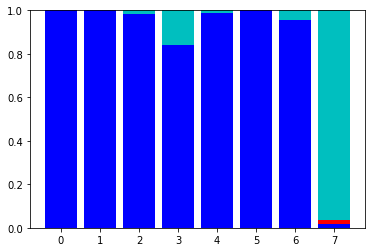

In [1295]:
import numpy as np
import matplotlib.pyplot as plt

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
couleurs = list()

for couleur in colors.keys():
    couleurs.append(couleur)


#valeurs = {"p1":[0.4, 0.55, 0.05, 0.0], "p2":[0.2, 0.3, 0.5, 0.0], "p3":[0.4, 0.2, 0.2, 0.2], "p4":[0.2, 0.2, 0.2, 0.4], "p5":[0.4, 0.55, 0.05, 0.0], "p6":[0.4, 0.55, 0.05, 0.0], "p7":[0.4, 0.55, 0.05, 0.0]}
colours = ['teal','wheat','aquamarine','navajowhite','darksalmon','cadetblue','coral','limeturquoise','deeppink']

valeurs_freq = dict()
valeurs_prob = dict()

for x in range(0,number_of_slices):   # initialising values[timeperiod] = "list of freq" dictionaries
    valeurs_freq[x] = list()
    valeurs_prob[x] = list()


for x in range(0,number_of_slices):
    list_freq = list()
    list_prob = list()
    total_prob_slice = 0
    
    for sense in correl_pairs.keys():
        #print("\t\t",x,sense)
        list_freq.append(correl_pairs[sense][0][x])
        list_prob.append(correl_pairs[sense][1][x])
        total_prob_slice += correl_pairs[sense][1][x]  # this counts the total probability for Tx, for normalising
        
    valeurs_freq[x] = list_freq
    valeurs_prob[x] = list_prob
    for i in range(0,len(valeurs_prob[x])):
        valeurs_prob[x][i] = valeurs_prob[x][i]/total_prob_slice
    
print("freq")
for key in valeurs_freq:
    print(valeurs_freq[key])
    
print("prob")
for key in valeurs_prob:
    print(valeurs_prob[key])


#for key in valeurs.keys():
    #print(key)
#    list_temp = list()
#    for item in valeurs[key]:
#        list_temp.append(int(item*100))
#    valeurs2[key] = list_temp

    #for value in valeurs
    

#for key,vals in valeurs_freq.items():
#    print(key,vals)
    
#    for i in range(0,len(vals)):        
#        if i == 0:
#            previous = 0
#            plt.bar(x=key, height=vals[i],bottom=previous,color=colours[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            
#        else:         
#            previous = vals[i-1] + previous
#            plt.bar(x=key, height=vals[i],bottom=previous,color=colours[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            
#plt.xticks(range(len(valeurs_freq)), valeurs_freq.keys())

#plt.show()

#for key in valeurs.keys():
    #print(key)
#    list_temp = list()
#    for item in valeurs[key]:
#        list_temp.append(int(item*100))
#    valeurs2[key] = list_temp

    #for value in valeurs

previous = 0

for key,vals in valeurs_prob.items():
    print(key,vals)
    
    for i in range(0,len(vals)):        
        if i == 0:
            previous = 0
            plt.bar(x=key, height=vals[i],bottom=previous,color=couleurs[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            
        else:         
            previous = vals[i-1] + previous
            plt.bar(x=key, height=vals[i],bottom=previous,color=couleurs[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            
plt.xticks(range(len(valeurs_prob)), valeurs_prob.keys())

plt.show()

## plotting expert

0 [0.075, 0.4, 0.525, 0.0]
lenght of vals 4
TOTAL HITS FOR SENSE mus-1 3
TOTAL HITS FOR SENSE NA 16
TOTAL HITS FOR SENSE mus-4 21
TOTAL HITS FOR SENSE mus-2 0
1 [0.5714285714285714, 0.42857142857142855, 0.0, 0.0]
lenght of vals 4
TOTAL HITS FOR SENSE mus-1 4
TOTAL HITS FOR SENSE NA 3
TOTAL HITS FOR SENSE mus-4 0
TOTAL HITS FOR SENSE mus-2 0
2 [0.25, 0.75, 0.0, 0.0]
lenght of vals 4
TOTAL HITS FOR SENSE mus-1 1
TOTAL HITS FOR SENSE NA 3
TOTAL HITS FOR SENSE mus-4 0
TOTAL HITS FOR SENSE mus-2 0
3 [0.4, 0.4, 0.2, 0.0]
lenght of vals 4
TOTAL HITS FOR SENSE mus-1 2
TOTAL HITS FOR SENSE NA 2
TOTAL HITS FOR SENSE mus-4 1
TOTAL HITS FOR SENSE mus-2 0
4 [0.25, 0.75, 0.0, 0.0]
lenght of vals 4
TOTAL HITS FOR SENSE mus-1 2
TOTAL HITS FOR SENSE NA 6
TOTAL HITS FOR SENSE mus-4 0
TOTAL HITS FOR SENSE mus-2 0
5 [0.28, 0.3, 0.42, 0.0]
lenght of vals 4
TOTAL HITS FOR SENSE mus-1 14
TOTAL HITS FOR SENSE NA 15
TOTAL HITS FOR SENSE mus-4 21
TOTAL HITS FOR SENSE mus-2 0
6 [0.15730337078651685, 0.5056179775

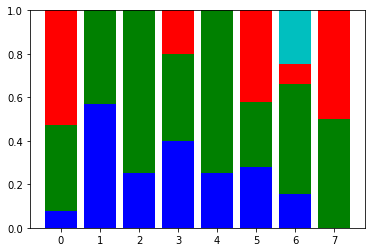

In [1296]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
couleurs = list()

for couleur in colors.keys():
    couleurs.append(couleur)


valeurs = period_relative
colours = ['teal','wheat','aquamarine','navajowhite','darksalmon','cadetblue','coral','limeturquoise','magenta','peru']
#colours = ['b','g','r','c','m','y','k','w']
colors = couleurs

for key,vals in valeurs.items():
    print(key,vals)
    print("lenght of vals",len(vals))
    
    
    
    for i in range(0,len(vals)):        
        if i == 0:
            print("TOTAL HITS FOR SENSE",expert_senses[i],sense_date_amount[expert_senses[i],key])
            previous = 0
            #print(i)
            #print(colours[i],"height=",vals[i])
            #plt.bar(x=key, height=vals[i],bottom=previous,color=colours[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            plt.bar(x=key, height=vals[i],bottom=previous,color=colors[i])
            
        else:         
            print("TOTAL HITS FOR SENSE",expert_senses[i],sense_date_amount[expert_senses[i],key])
            previous = vals[i-1] + previous
            #print("i",i,"key=period",key)
            #print(colours[i],"height=",vals[i])
            #print(vals[i])
            #plt.bar(x=key, height=vals[i],bottom=previous,color=colours[i])
            #plt.bar(x=key, height=vals[i],bottom=previous)
            plt.bar(x=key, height=vals[i],bottom=previous,color=colors[i])
            
plt.xticks(range(len(valeurs)), valeurs.keys())

expert_image = s_senses.name.split("/")[-1]

#plt.figure(figsize=(20,10))
image = plt.gcf()
image.savefig(dir_out+"/"+expert_image+".png")
plt.show()